In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Set Pandas options for better display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth', 200)

In [4]:
# Data Dictionary
data_dict = pd.read_excel('Data+Dictionary-+Telecom+Churn+Case+Study.xlsx',header=1,usecols=[1,2],)

#Importing Data
df_data = pd.read_csv('telecom_churn_data.csv',encoding="utf-8")

In [5]:
#checking the data dictionary
data_dict

,Customer phone number
0,Telecom circle area to which the customer belongs to
1,Local calls - within same telecom circle
2,STD calls - outside the calling circle
3,Incoming calls
4,Outgoing calls
5,"Operator T to T, i.e. within same operator (mobile to mobile)"
6,Operator T to other operator mobile
7,Operator T to other operator fixed line
8,Operator T to fixed lines of T
9,Operator T to it’s own call center


In [6]:
df_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [7]:
df_data.shape

(99999, 226)

In [8]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [9]:
df_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [10]:
# Function to display null percentages in descending order
def null_summary(data):
    df = pd.DataFrame([data.isnull().sum(),
              round(100*(data.isnull().sum()/len(data.index)), 2)]
            ).T.rename(columns={0:'Null Count',1:'Null Percentage'}).\
sort_values(by='Null Percentage',ascending=False)
    return df

In [11]:
null_summary(df_data)

,Null Count,Null Percentage
arpu_3g_6,74846.0,74.85
night_pck_user_6,74846.0,74.85
total_rech_data_6,74846.0,74.85
arpu_2g_6,74846.0,74.85
max_rech_data_6,74846.0,74.85
fb_user_6,74846.0,74.85
av_rech_amt_data_6,74846.0,74.85
date_of_last_rech_data_6,74846.0,74.85
count_rech_2g_6,74846.0,74.85
count_rech_3g_6,74846.0,74.85


In [12]:
#impute NaN with 0 for important columns for calculating average revnue in June and July

listcol=['av_rech_amt_data_6','total_rech_data_6','total_rech_amt_6','total_rech_num_6',
         'av_rech_amt_data_7','total_rech_data_7','total_rech_amt_7','total_rech_num_7']

df_data[listcol]=df_data[listcol].apply(lambda x: x.fillna(0))  

In [13]:
null_summary(df_data[listcol])

df_data[listcol]

,av_rech_amt_data_6,total_rech_data_6,total_rech_amt_6,total_rech_num_6,av_rech_amt_data_7,total_rech_data_7,total_rech_amt_7,total_rech_num_7
0,252.0,1.0,362,4,252.0,1.0,252,3
1,0.0,0.0,74,4,154.0,1.0,384,9
2,0.0,0.0,168,5,0.0,0.0,315,4
3,0.0,0.0,230,10,0.0,0.0,310,11
4,56.0,1.0,196,5,0.0,0.0,350,6
5,0.0,0.0,120,2,0.0,0.0,0,2
6,0.0,0.0,499,15,0.0,0.0,222,10
7,0.0,0.0,1580,5,0.0,0.0,790,5
8,0.0,0.0,437,19,177.0,2.0,601,21
9,0.0,0.0,220,4,154.0,1.0,195,2


In [14]:
#Deriving some New Features and Calculating avg revnue in Juny July

df_data['total_june']=df_data['av_rech_amt_data_6']*df_data['total_rech_data_6']+df_data['total_rech_amt_6']

df_data['total_july']=df_data['av_rech_amt_data_7']*df_data['total_rech_data_7']+df_data['total_rech_amt_7']

df_data['total_junejuly']=df_data['total_june']+df_data['total_july']

df_data['avg_junejuly']=df_data['total_junejuly']/2

In [15]:
df_data[['total_june','total_july','total_junejuly','avg_junejuly']]

,total_june,total_july,total_junejuly,avg_junejuly
0,614.0,504.0,1118.0,559.0
1,74.0,538.0,612.0,306.0
2,168.0,315.0,483.0,241.5
3,230.0,310.0,540.0,270.0
4,252.0,350.0,602.0,301.0
5,120.0,0.0,120.0,60.0
6,499.0,222.0,721.0,360.5
7,1580.0,790.0,2370.0,1185.0
8,437.0,955.0,1392.0,696.0
9,220.0,349.0,569.0,284.5


In [16]:
#checking different percentile values to note outliers..
df_data['avg_junejuly'].quantile([0.10,0.25,0.50,0.70,0.9,0.95,0.98,0.99,0.995,0.999])

0.100       60.000
0.250      128.000
0.500      275.000
0.700      478.000
0.900     1028.000
0.950     1512.000
0.980     2420.020
0.990     3363.510
0.995     4696.520
0.999    10415.707
Name: avg_junejuly, dtype: float64

In [17]:
#Filtering out the High Value Customers based on the 70th Percentile value as seen above

df_data_high_value_cust = df_data.loc[((df_data.avg_junejuly>=478)&(df_data.avg_junejuly<=10000)),:]
df_data_high_value_cust.shape

(29895, 230)

**Tagging churners and Removing attributes of the churn phase**

In [18]:
#churn phase columns
col= ['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']

#checking Null summary of Churn Phase columns
null_summary(df_data_high_value_cust[col])

,Null Count,Null Percentage
total_ic_mou_9,0.0,0.0
total_og_mou_9,0.0,0.0
vol_2g_mb_9,0.0,0.0
vol_3g_mb_9,0.0,0.0


In [19]:
df_data_high_value_cust[col].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00
8,34.91,142.18,0.00,0.00
21,252.61,1031.53,0.00,0.00
23,127.48,127.63,13.93,314.74


In [20]:
#adding all the churn phase column values and tagging churn if sum is 0.

df_data_high_value_cust['churn'] = df_data_high_value_cust[col].sum(axis=1)

df_data_high_value_cust['churn'] = df_data_high_value_cust['churn'].apply(lambda x: 1 if x==0 else 0) 

df_data_high_value_cust[['churn']]

,churn
0,1
7,1
8,0
21,0
23,0
38,0
41,0
48,0
53,0
56,0


**Removing attributes corresponding to churn phase**

In [21]:
#creating a list of all columns
col_list = list(df_data_high_value_cust.columns)

col_list

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

In [22]:
#selecting the churn phase columns
churn_phase_cols = [x for x in col_list if '_9' in x]

churn_phase_cols.append('sep_vbc_3g')

print(len(churn_phase_cols))

churn_phase_cols

55


['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

In [23]:
#dropping the churn phase columns
df_data_high_value_cust.drop(columns=churn_phase_cols,inplace=True)

df_data_high_value_cust.shape

(29895, 176)

In [24]:
#checking the null summary
null_summary(df_data_high_value_cust)

,Null Count,Null Percentage
date_of_last_rech_data_8,14040.0,46.96
fb_user_8,14040.0,46.96
arpu_3g_8,14040.0,46.96
av_rech_amt_data_8,14040.0,46.96
arpu_2g_8,14040.0,46.96
night_pck_user_8,14040.0,46.96
count_rech_3g_8,14040.0,46.96
total_rech_data_8,14040.0,46.96
count_rech_2g_8,14040.0,46.96
max_rech_data_8,14040.0,46.96


In [25]:
#creating a list of columns (to drop) that have more than 20% null values
drop_columns=list(null_summary(df_data_high_value_cust).loc[null_summary(df_data_high_value_cust)['Null Percentage'] > 20 , :].index)
drop_columns

['date_of_last_rech_data_8',
 'fb_user_8',
 'arpu_3g_8',
 'av_rech_amt_data_8',
 'arpu_2g_8',
 'night_pck_user_8',
 'count_rech_3g_8',
 'total_rech_data_8',
 'count_rech_2g_8',
 'max_rech_data_8',
 'count_rech_2g_6',
 'fb_user_6',
 'date_of_last_rech_data_6',
 'max_rech_data_6',
 'arpu_3g_6',
 'count_rech_3g_6',
 'night_pck_user_6',
 'arpu_2g_6',
 'count_rech_2g_7',
 'arpu_2g_7',
 'max_rech_data_7',
 'fb_user_7',
 'arpu_3g_7',
 'date_of_last_rech_data_7',
 'night_pck_user_7',
 'count_rech_3g_7']

In [26]:
#dropping high null value and some non-useful columns as well:

listcol=['av_rech_amt_data_6','total_rech_data_6','total_rech_amt_6','total_rech_num_6',
         'av_rech_amt_data_7','total_rech_data_7','total_rech_amt_7','total_rech_num_7',
        'circle_id','mobile_number','total_june','total_july']

drop_columns.extend(listcol)

df_data_high_value_cust.drop(columns=drop_columns,inplace=True)

print(df_data_high_value_cust.shape)

(29895, 138)


In [27]:
null_summary(df_data_high_value_cust)

,Null Count,Null Percentage
std_og_t2f_mou_8,1170.0,3.91
og_others_8,1170.0,3.91
roam_og_mou_8,1170.0,3.91
loc_og_t2t_mou_8,1170.0,3.91
loc_ic_t2t_mou_8,1170.0,3.91
loc_og_t2m_mou_8,1170.0,3.91
spl_ic_mou_8,1170.0,3.91
loc_og_t2f_mou_8,1170.0,3.91
loc_og_t2c_mou_8,1170.0,3.91
loc_ic_t2f_mou_8,1170.0,3.91


In [28]:
#dropping datetype columns
datetype_cols = list(df_data_high_value_cust.select_dtypes(include=['object']).columns)

datetype_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8']

In [29]:
df_data_high_value_cust.drop(columns=datetype_cols,inplace=True)

print(df_data_high_value_cust.shape)

(29895, 132)


In [30]:
#impute missing values of remaining columns with the median of the respective columns, since less than 4% missing values only

df_data_high_value_cust = df_data_high_value_cust.apply(lambda x: x.fillna(x.median()))  

In [31]:
#No null values left
null_summary(df_data_high_value_cust)

,Null Count,Null Percentage
loc_og_t2o_mou,0.0,0.0
std_ic_t2o_mou_8,0.0,0.0
ic_others_7,0.0,0.0
ic_others_6,0.0,0.0
isd_ic_mou_8,0.0,0.0
isd_ic_mou_7,0.0,0.0
isd_ic_mou_6,0.0,0.0
spl_ic_mou_8,0.0,0.0
spl_ic_mou_7,0.0,0.0
spl_ic_mou_6,0.0,0.0


In [32]:
#checking for single unique values in the dataframe

df_data_high_value_cust.nunique()

loc_og_t2o_mou            1
std_og_t2o_mou            1
loc_ic_t2o_mou            1
arpu_6                28969
arpu_7                28980
arpu_8                27971
onnet_mou_6           16865
onnet_mou_7           16959
onnet_mou_8           15846
offnet_mou_6          21173
offnet_mou_7          21223
offnet_mou_8          20119
roam_ic_mou_6          4042
roam_ic_mou_7          3381
roam_ic_mou_8          3424
roam_og_mou_6          4738
roam_og_mou_7          3986
roam_og_mou_8          3990
loc_og_t2t_mou_6      10405
loc_og_t2t_mou_7      10381
loc_og_t2t_mou_8      10050
loc_og_t2m_mou_6      15599
loc_og_t2m_mou_7      15652
loc_og_t2m_mou_8      15105
loc_og_t2f_mou_6       3088
loc_og_t2f_mou_7       3097
loc_og_t2f_mou_8       2985
loc_og_t2c_mou_6       1675
loc_og_t2c_mou_7       1760
loc_og_t2c_mou_8       1718
loc_og_mou_6          18321
loc_og_mou_7          18469
loc_og_mou_8          17549
std_og_t2t_mou_6      11089
std_og_t2t_mou_7      11237
std_og_t2t_mou_8    

In [33]:
#dropping all columns having single unique values

single_unique_vals= ['loc_og_t2o_mou','std_og_t2c_mou_7','std_ic_t2o_mou_8',
'std_ic_t2o_mou_7','std_ic_t2o_mou_6','std_og_t2c_mou_8','std_og_t2c_mou_6','std_og_t2o_mou','loc_ic_t2o_mou']

df_data_high_value_cust.drop(columns=single_unique_vals,inplace=True)

print(df_data_high_value_cust.shape)


(29895, 123)


In [34]:
#Reviewing the dataframe
df_data_high_value_cust.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_junejuly,avg_junejuly,churn
0,197.385,214.816,213.803,88.53,87.24,0.00,230.24,227.61,0.00,0.00,0.00,0.00,0.00,0.00,0.00,25.63,25.83,0.00,80.48,81.86,0.00,0.13,0.21,0.00,0.0,0.0,0.00,129.81,133.08,0.00,3.43,3.36,0.00,18.36,17.90,0.00,0.00,0.00,0.00,51.29,50.44,0.00,0.0,0.00,0.00,0.31,0.81,0.00,0.0,0.0,0.0,0.00,0.00,0.00,26.08,26.73,0.16,86.86,88.61,4.13,2.01,2.16,1.15,138.84,142.03,5.44,0.48,0.55,0.00,5.36,5.56,0.00,0.00,0.00,0.00,12.01,12.78,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,2,252,252,252,252,252,252,252,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,1118.0,559.0,1
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,7,3638,1580,790,1580,0,0,779,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,2370.0,1185.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,14,120,90,154,30,50,0,10,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,1392.0,696.0,0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.00,0.00,0.00,763.29,934.69,938.79,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,860.34,1028.79,1068.54,2.48,10.19,19.54,11

In [35]:
df_data_high_value_cust.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_junejuly,avg_junejuly,churn
count,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.00000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.00000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000,29895.000000
mean,553.566205,554.590322,503.941514,262.661907,269.740940,236.984404,378.028542,382.319542,342.831248,16.153330,12.666911,12.511844,26.630999,20.149139,19.861661,84.986355,86.185034,78.944084,164.830790,164.668147,154.809052,6.355803,6.431690,5.889719,1.570705,1.885250,1.706608,256.608507,257.741333,240.555962,166.145641,174.617598,148.549133,180.159527,188.604941,158.097789,1.803125,1.825604,1.585119,348.646858,365.571142,308.980943,1.776962,1.669438,1.56216,5.815540,7.111287,6.574329,0.659227,0.043057,0.057808,610.227133,628.863949,551.686997,66.024231,67.221422,63.689921,152.12252,153.364914,149.757023,15.333272,16.086055,14.490828,233.9

In [36]:
df_data_high_value_cust.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_junejuly,avg_junejuly,churn
0,197.385,214.816,213.803,88.53,87.24,0.00,230.24,227.61,0.00,0.00,0.00,0.00,0.00,0.00,0.00,25.63,25.83,0.00,80.48,81.86,0.00,0.13,0.21,0.00,0.0,0.0,0.00,129.81,133.08,0.00,3.43,3.36,0.00,18.36,17.90,0.00,0.00,0.00,0.00,51.29,50.44,0.00,0.0,0.00,0.00,0.31,0.81,0.00,0.0,0.0,0.0,0.00,0.00,0.00,26.08,26.73,0.16,86.86,88.61,4.13,2.01,2.16,1.15,138.84,142.03,5.44,0.48,0.55,0.00,5.36,5.56,0.00,0.00,0.00,0.00,12.01,12.78,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,2,252,252,252,252,252,252,252,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,1118.0,559.0,1
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,7,3638,1580,790,1580,0,0,779,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,2370.0,1185.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,14,120,90,154,30,50,0,10,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,1392.0,696.0,0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.00,0.00,0.00,763.29,934.69,938.79,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,860.34,1028.79,1068.54,2.48,10.19,19.54,11

**Deriving New Features**
- Total revnue through calls and data was earlier derived for the months of June and July
- Now, we derive the follwoing metrics:
- sum of all incoming mou for each month
- sum of all outgoing mou for each month

In [37]:
#sum of all incoming mou for each month

incoming_cols_6 = [x for x in df_data_high_value_cust.columns if '_6' in x]
incoming_cols_6 = [x for x in incoming_cols_6 if '_ic_' in x]
print(incoming_cols_6)
print("\n")
s=0;
for item in incoming_cols_6:
    s=s+df_data_high_value_cust[item]
df_data_high_value_cust['cust_total_ic_6']=s


incoming_cols_7 = [x for x in df_data_high_value_cust.columns if '_7' in x]
incoming_cols_7 = [x for x in incoming_cols_7 if '_ic_' in x]
print(incoming_cols_7)
print("\n")
s=0;
for item in incoming_cols_7:
    s=s+df_data_high_value_cust[item]
df_data_high_value_cust['cust_total_ic_7']=s


incoming_cols_8 = [x for x in df_data_high_value_cust.columns if '_8' in x]
incoming_cols_8 = [x for x in incoming_cols_8 if '_ic_' in x]
print(incoming_cols_8)
print("\n")
s=0;
for item in incoming_cols_8:
    s=s+df_data_high_value_cust[item]
df_data_high_value_cust['cust_total_ic_8']=s


['roam_ic_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6']


['roam_ic_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7', 'total_ic_mou_7', 'spl_ic_mou_7', 'isd_ic_mou_7']


['roam_ic_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8']




In [38]:
#sum of all outgoing mou for each month

outgoing_cols_6 = [x for x in df_data_high_value_cust.columns if '_6' in x]
outgoing_cols_6 = [x for x in outgoing_cols_6 if '_og_' in x]
print(outgoing_cols_6)
print("\n")
s=0;
for item in outgoing_cols_6:
    s=s+df_data_high_value_cust[item]
df_data_high_value_cust['cust_total_og_6']=s


outgoing_cols_7 = [x for x in df_data_high_value_cust.columns if '_7' in x]
outgoing_cols_7 = [x for x in outgoing_cols_7 if '_og_' in x]
print(outgoing_cols_7)
print("\n")
s=0;
for item in outgoing_cols_7:
    s=s+df_data_high_value_cust[item]
df_data_high_value_cust['cust_total_og_7']=s


outgoing_cols_8 = [x for x in df_data_high_value_cust.columns if '_8' in x]
outgoing_cols_8 = [x for x in outgoing_cols_8 if '_og_' in x]
print(outgoing_cols_8)
print("\n")
s=0;
for item in outgoing_cols_8:
    s=s+df_data_high_value_cust[item]
df_data_high_value_cust['cust_total_og_8']=s



['roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'total_og_mou_6']


['roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'isd_og_mou_7', 'spl_og_mou_7', 'total_og_mou_7']


['roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'total_og_mou_8']




**Exploratory Data Analysis (EDA)**

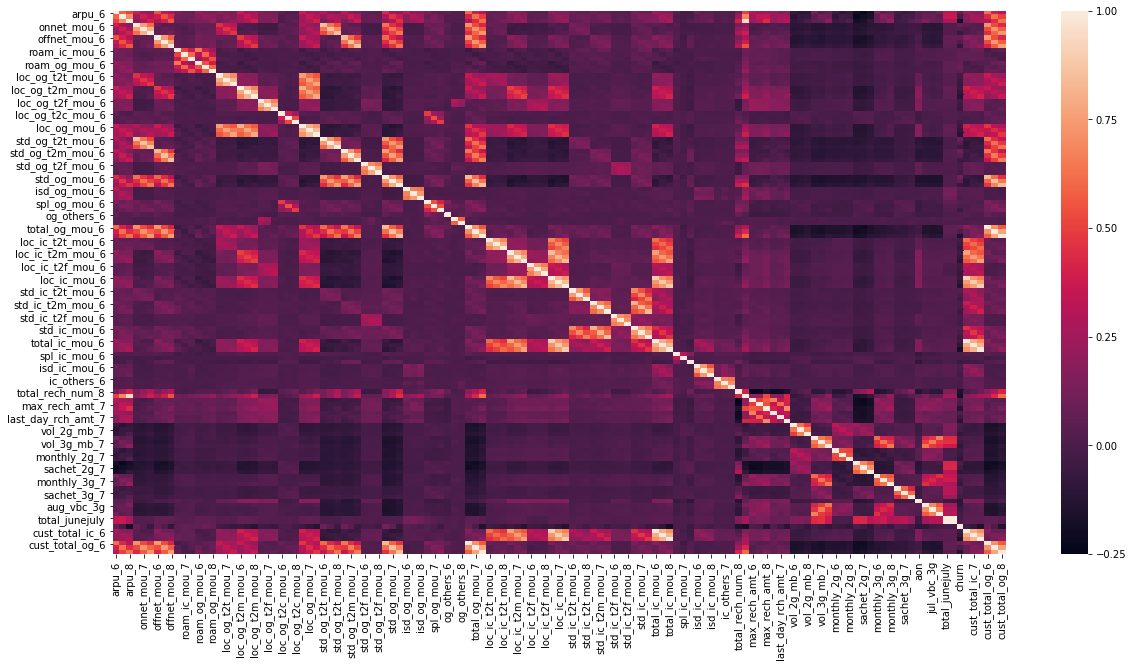

In [39]:
# Now lets check the correlation matrix using a heatmap 
# Size of the figure
plt.figure(figsize = (20,10))       
sns.heatmap(df_data_high_value_cust.corr())

#We observe that there is NOT much Correlation between features.

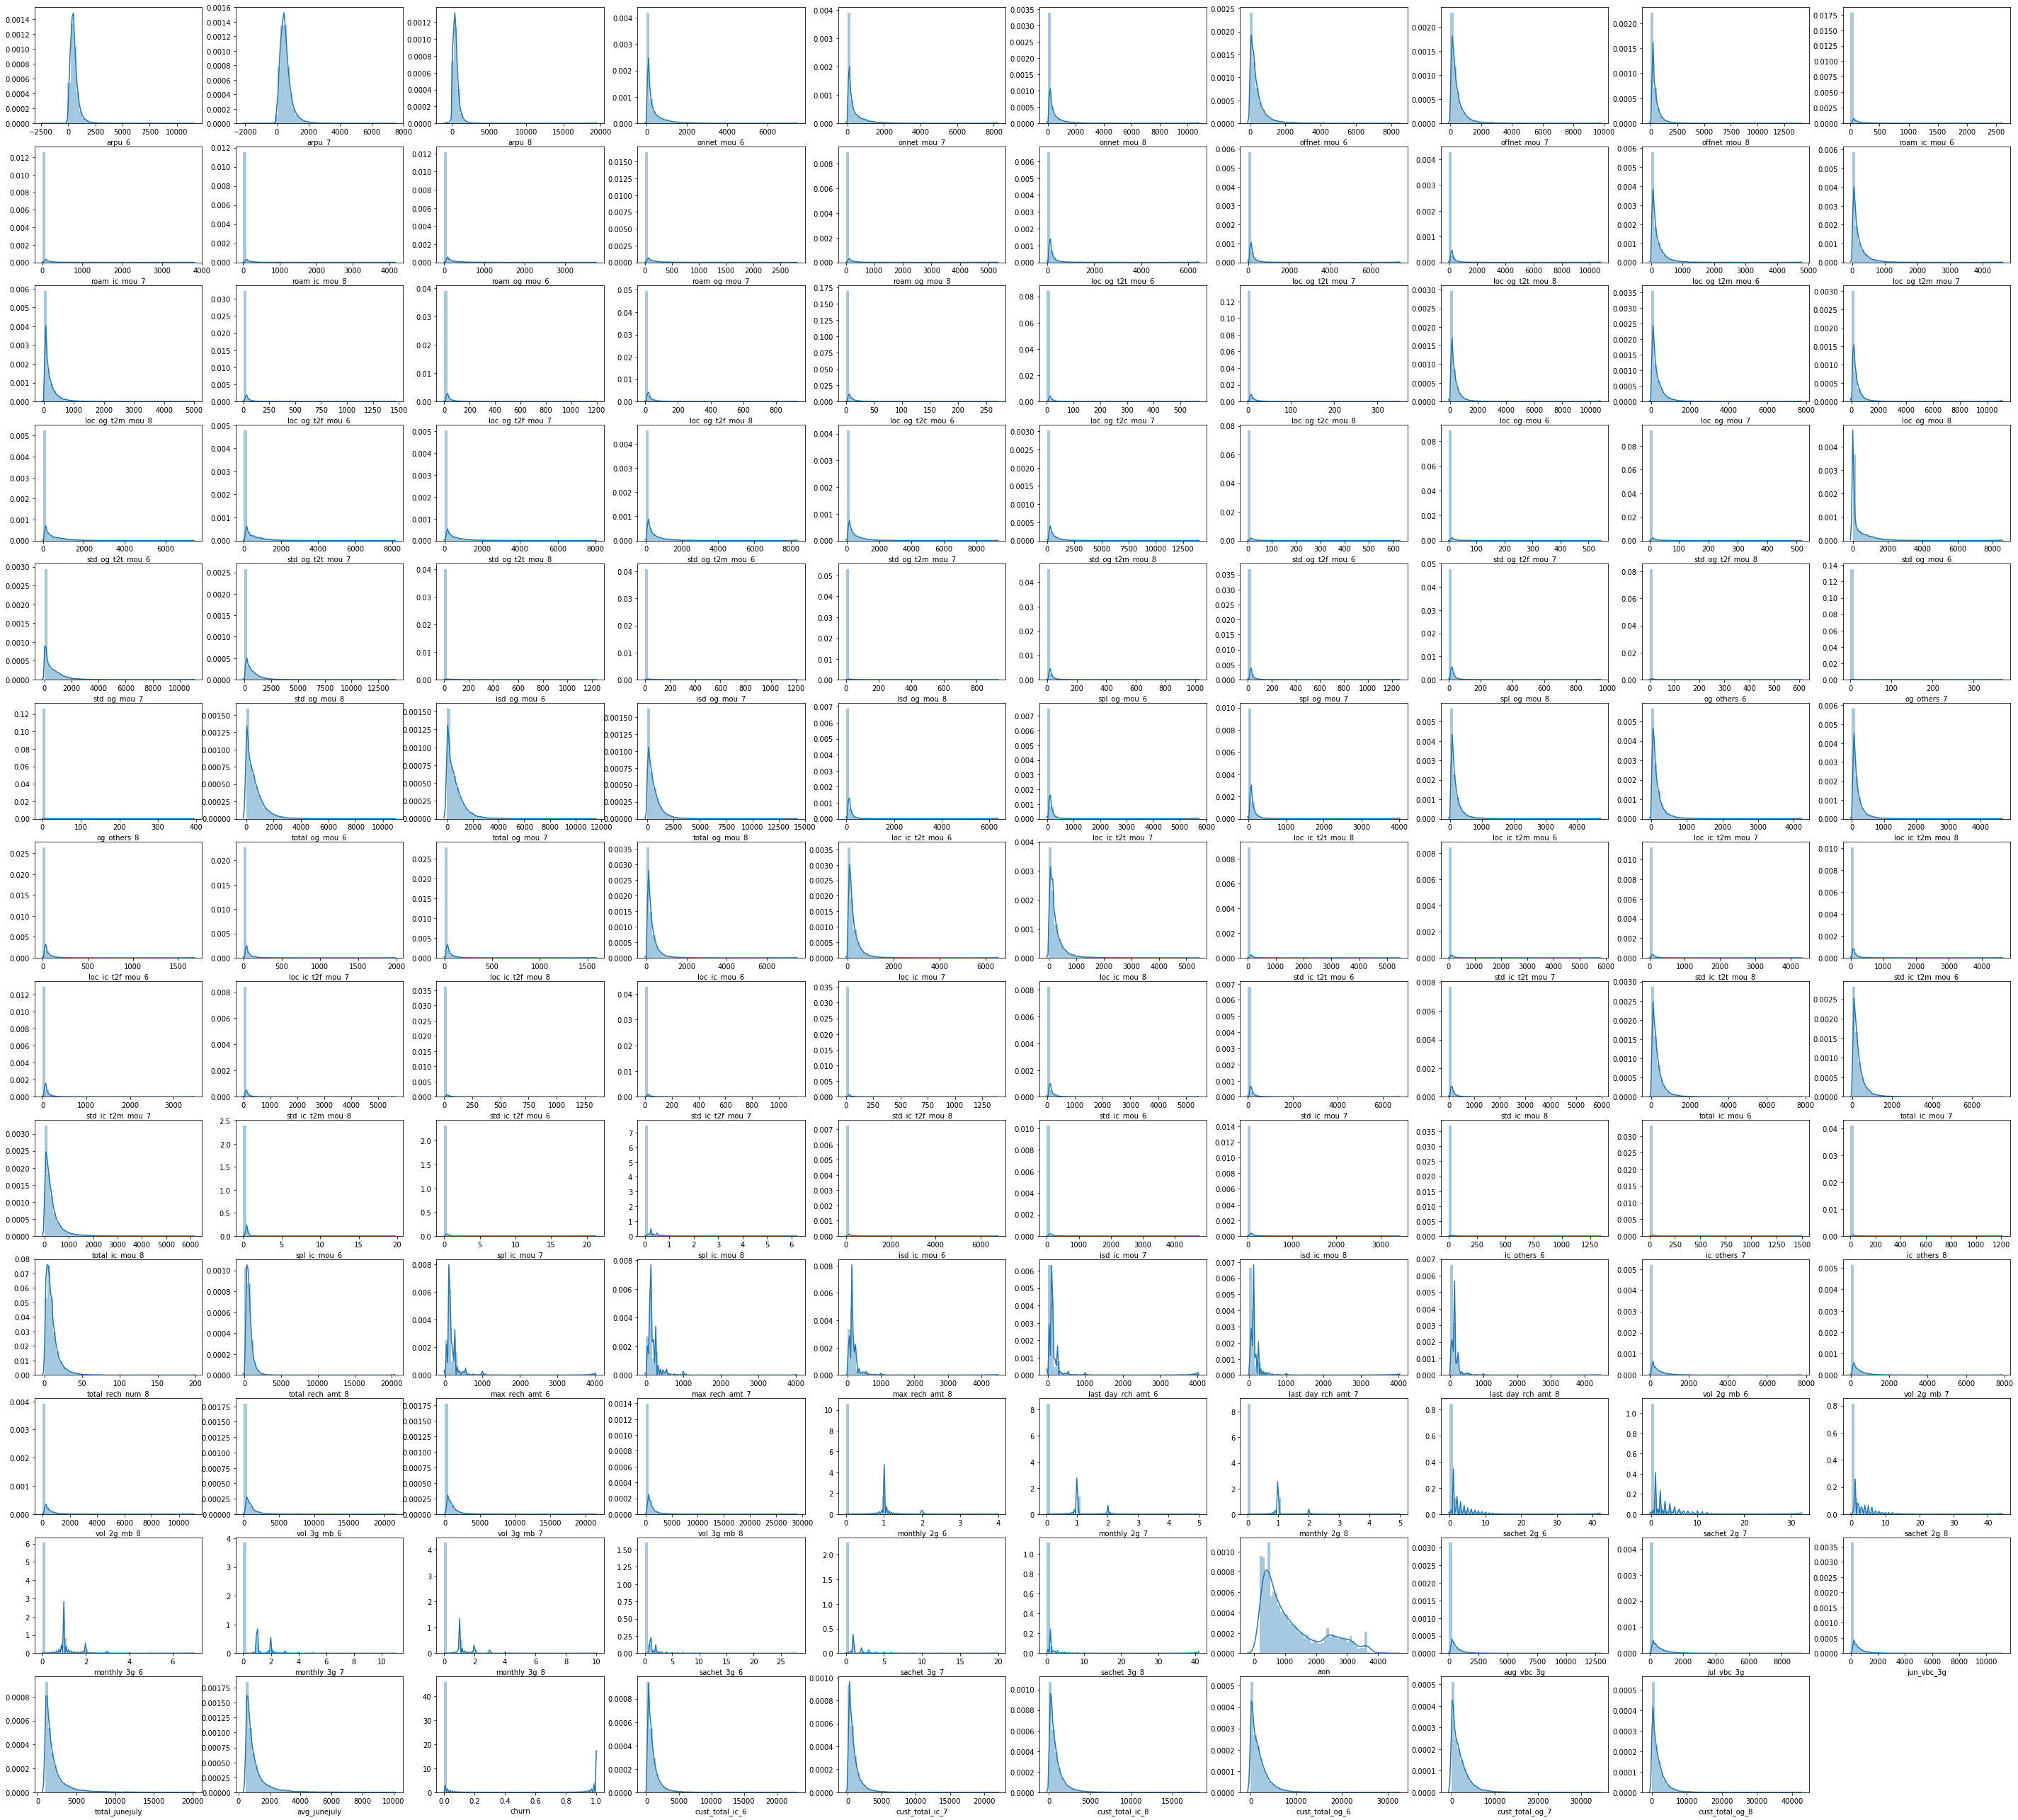

In [40]:
plt.figure(figsize=(50, 50))

cnt = 1
for var in df_data_high_value_cust.columns:
    plt.subplot(14, 10, cnt)
    if var not in ['chrun'] :
        sns.distplot(df_data_high_value_cust[var])
        cnt=cnt+1

plt.show()

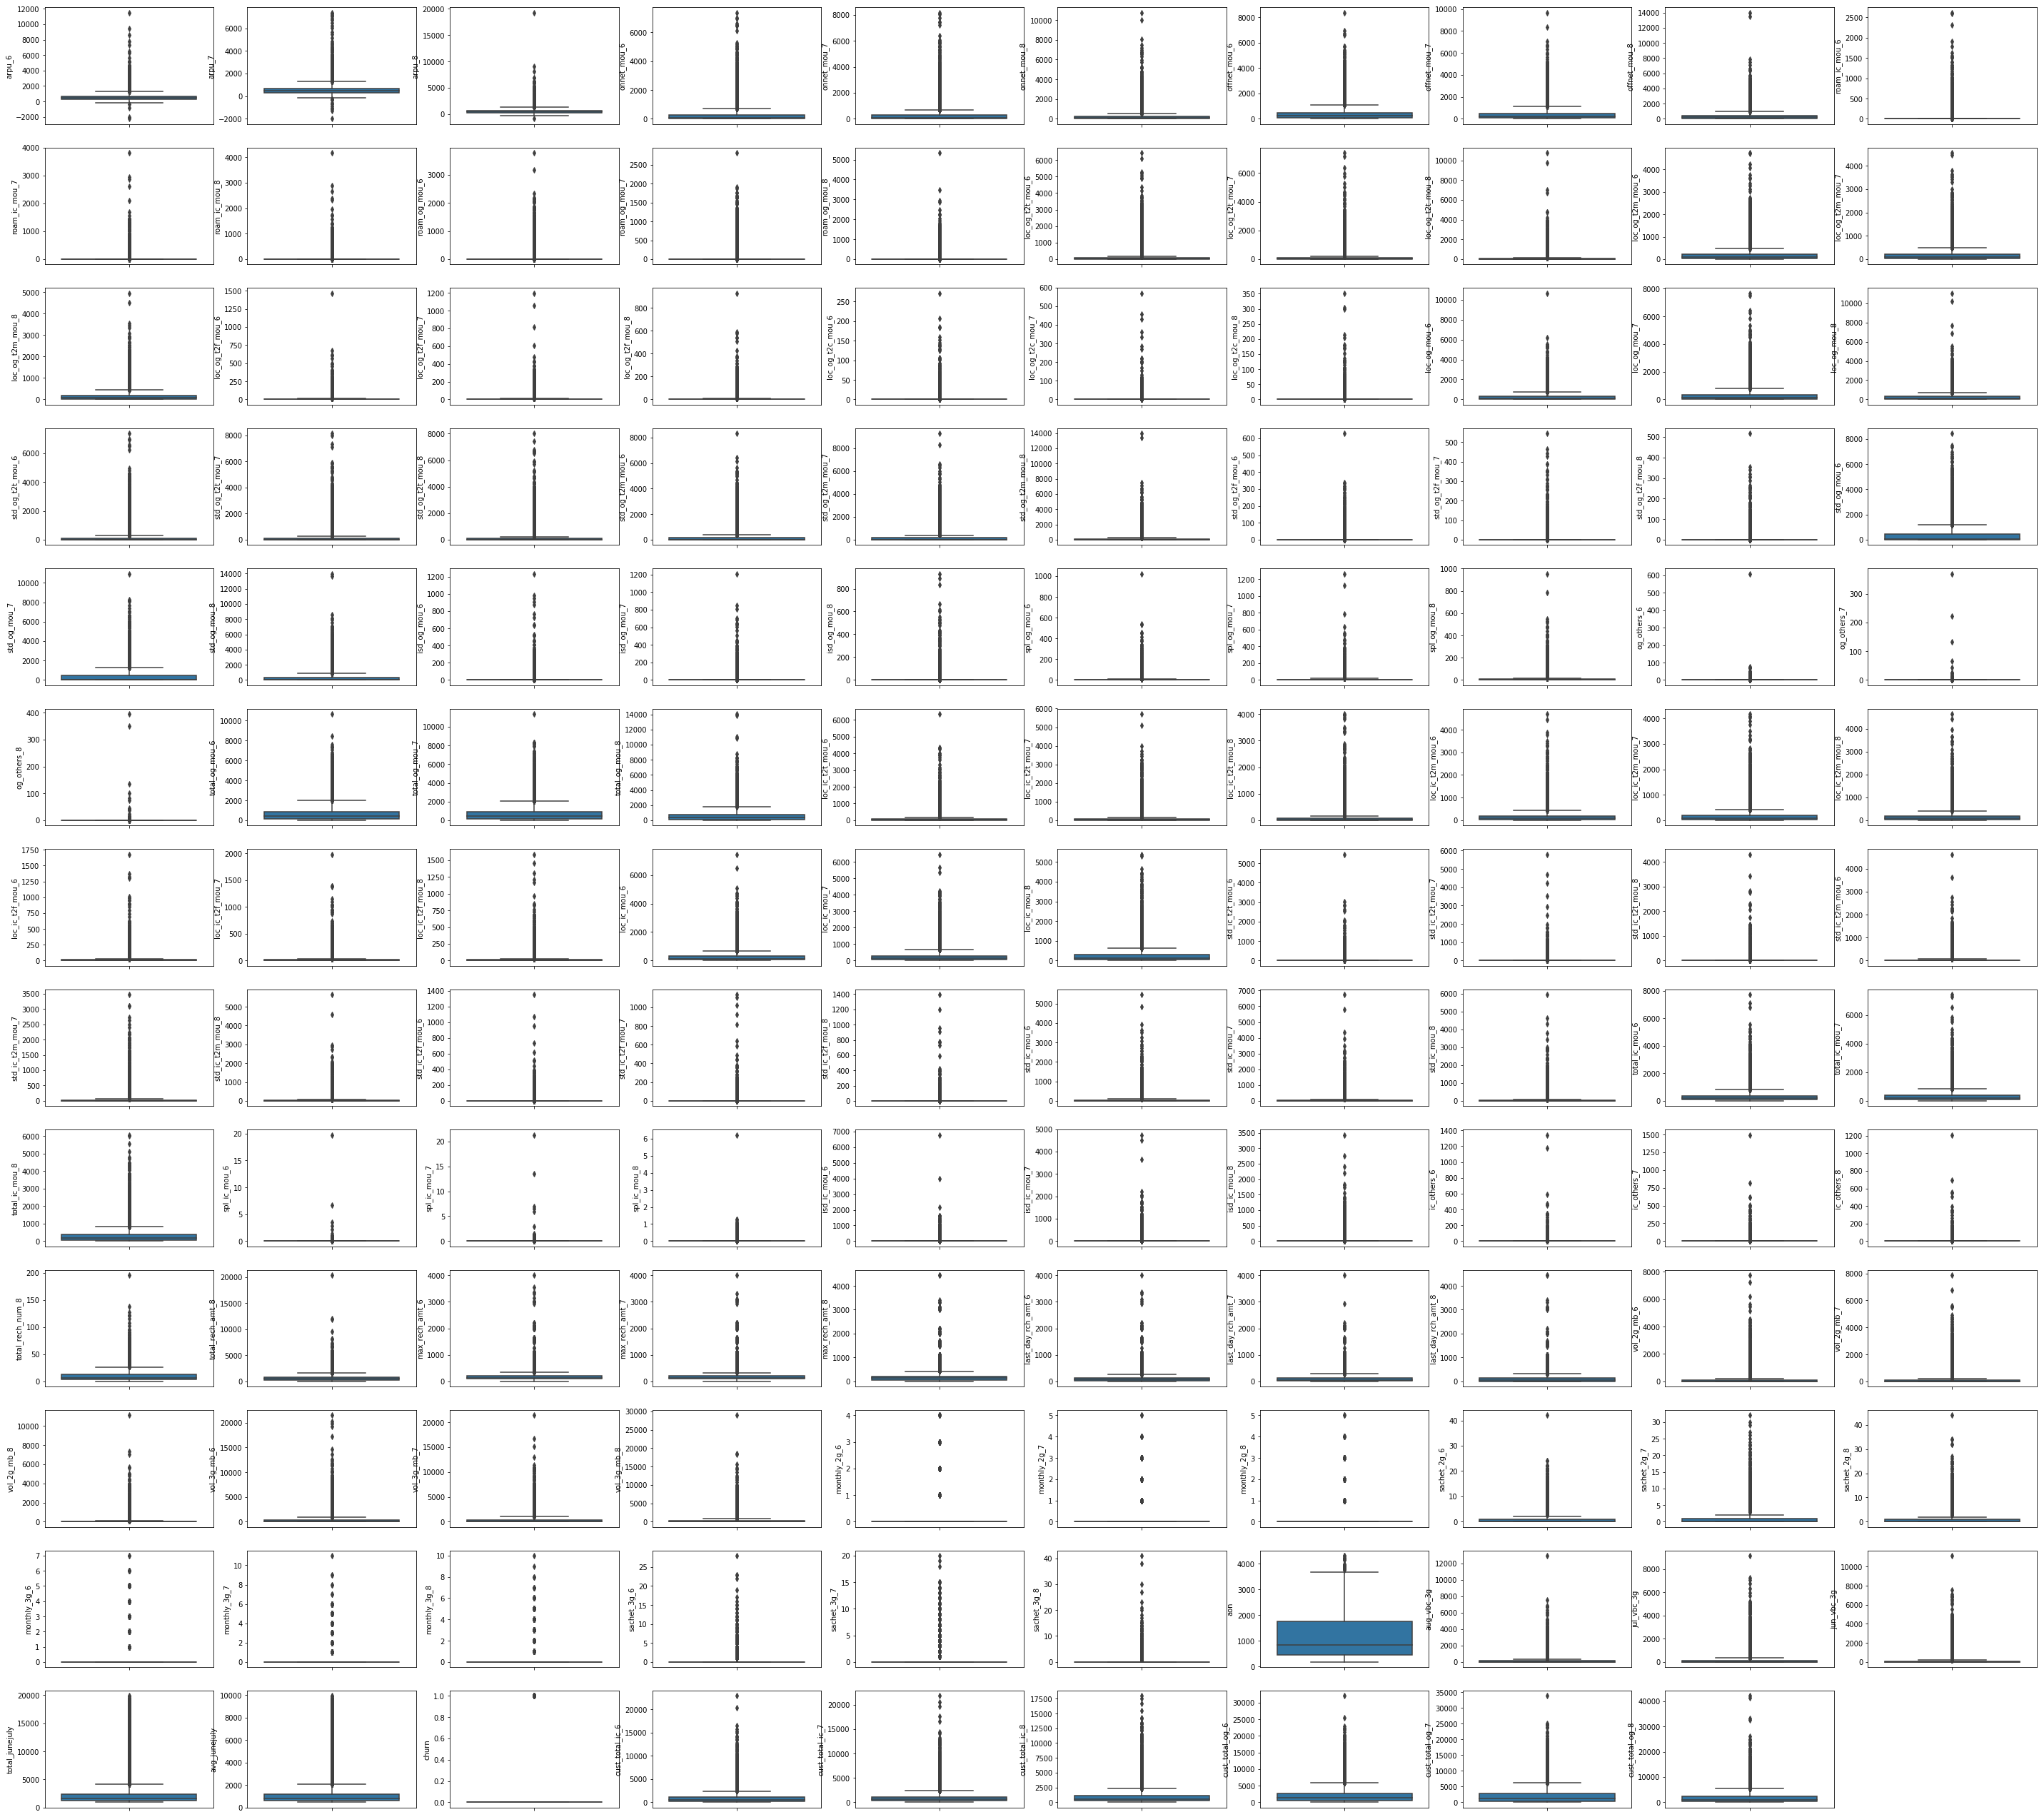

In [41]:
plt.figure(figsize=(50, 50))

cnt = 1
for var in df_data_high_value_cust.columns:
    plt.subplot(14, 10, cnt)
    if var not in ['chrun'] :
        sns.boxplot(y=df_data_high_value_cust[var])
        cnt=cnt+1

plt.show()

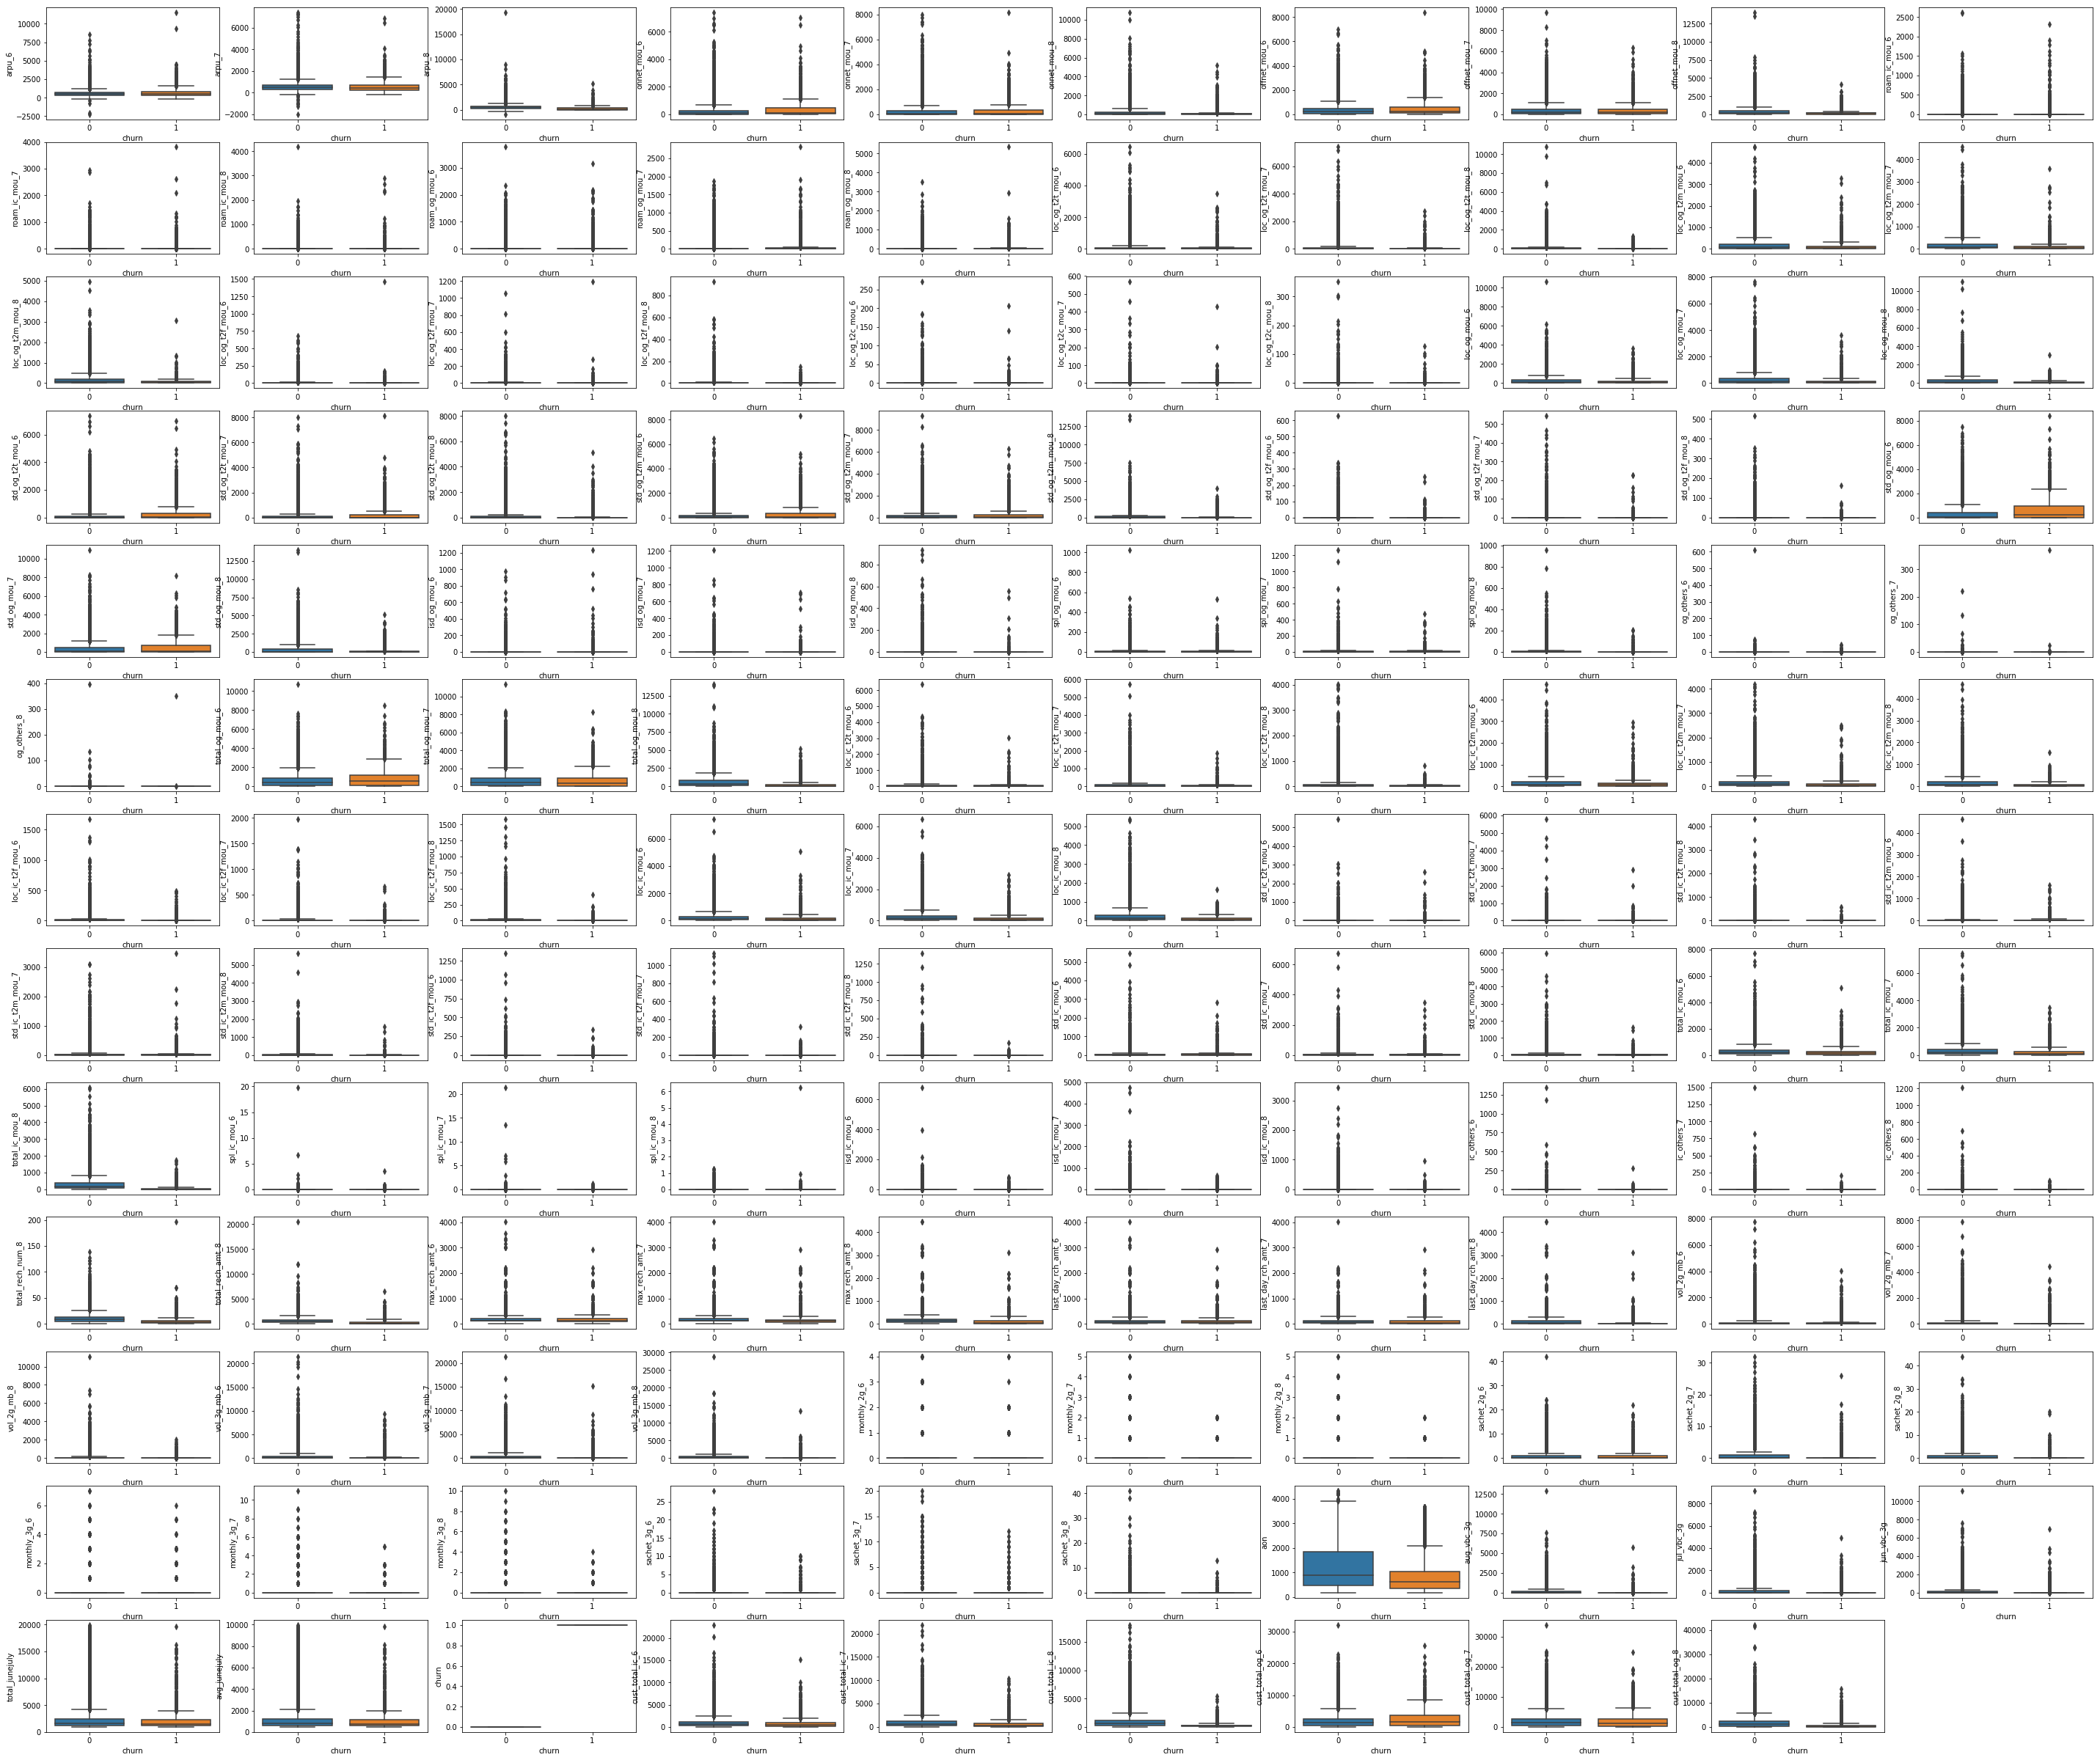

In [42]:
plt.figure(figsize=(50, 50))

cnt = 1
for var in df_data_high_value_cust.columns:
    plt.subplot(15, 10, cnt)
    if var not in ['chrun'] :
        sns.boxplot(x = 'churn', y = var, data=df_data_high_value_cust)
        cnt=cnt+1

plt.show()

We observed quite a lot of outliers, thus we now do 
**Outlier Treatment**

In [43]:
df_data_high_value_cust.shape

(29895, 129)

In [44]:
outlier_set = df_data_high_value_cust

In [45]:
outlier_vars=['arpu_6', 'arpu_7', 'arpu_8', 
              'total_junejuly',
              'cust_total_og_6', 'cust_total_og_6', 'cust_total_og_6',
              'cust_total_ic_6', 'cust_total_ic_7', 'cust_total_ic_8'
             ]

In [46]:
for var in outlier_vars:
    print("outlier=> "+ var)
    Q1 = df_data_high_value_cust[var].quantile(0.25)
    Q3 = df_data_high_value_cust[var].quantile(0.75)
    IQR = Q3 - Q1
    df_data_high_value_cust = df_data_high_value_cust[ ((df_data_high_value_cust[var] >= Q1 - 1.5*IQR) & (df_data_high_value_cust[var] <= Q3 + 1.5*IQR)) ]


outlier=> arpu_6
outlier=> arpu_7
outlier=> arpu_8
outlier=> total_junejuly
outlier=> cust_total_og_6
outlier=> cust_total_og_6
outlier=> cust_total_og_6
outlier=> cust_total_ic_6
outlier=> cust_total_ic_7
outlier=> cust_total_ic_8


In [47]:
df_data_high_value_cust.shape

(20326, 129)

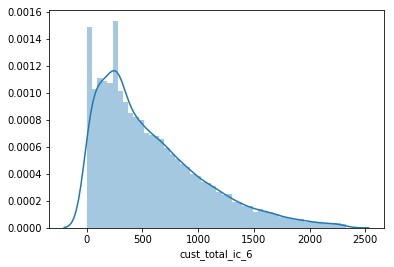

In [48]:
sns.distplot(df_data_high_value_cust['cust_total_ic_6'])
plt.show()

**Class Imbalance**

In [49]:
df_data_high_value_cust['churn'].sum()/df_data_high_value_cust['churn'].count()

#We observe About 8.1% churn rate, So We note that there is a CLASS IMBALANCE

0.08225917544032274

**Data Preparation For PCA**

In [50]:
#we drop the churn column since we need only numerical data in doing PCA
pca_df=df_data_high_value_cust.drop(columns={'churn'})
pca_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_junejuly,avg_junejuly,cust_total_ic_6,cust_total_ic_7,cust_total_ic_8,cust_total_og_6,cust_total_og_7,cust_total_og_8
0,197.385,214.816,213.803,88.53,87.24,0.00,230.24,227.61,0.00,0.0,0.0,0.0,0.0,0.0,0.0,25.63,25.83,0.00,80.48,81.86,0.00,0.13,0.21,0.00,0.0,0.0,0.00,129.81,133.08,0.00,3.43,3.36,0.00,18.36,17.90,0.00,0.0,0.0,0.0,51.29,50.44,0.00,0.0,0.00,0.0,0.31,0.81,0.00,0.0,0.0,0.0,0.00,0.00,0.00,26.08,26.73,0.16,86.86,88.61,4.13,2.01,2.16,1.15,138.84,142.03,5.44,0.48,0.55,0.00,5.36,5.56,0.00,0.0,0.0,0.0,12.01,12.78,0.00,0.00,0.00,5.44,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,2,252,252,252,252,252,252,252,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,1118.0,559.0,271.64,278.42,16.32,309.44,313.49,0.00
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.0,0.0,0.0,0.0,0.0,0.0,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.0,0.00,0.00,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,14,120,90,154,30,50,0,10,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,1392.0,696.0,311.57,85.46,49.62,1525.05,1294.96,511.56
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.0,0.0,0.0,0.0,0.0,0.0,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.0,0.0,0.0,763.29,934.69,938.79,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,860.34,1028.79,1068.54,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,125.33,87.68,159.11,14.06,5.98,0.18,67.69,38.23,101.74,0.0,0.0,0.0,81.76,44.21,101.93,207.09,131.89,261.04,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,27,718,50,50,50,30,20,50,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,720,0.00,0.00,0.00,1280.0,640.0,621.25,395.65,783.09,2581.00,3086.34,3205.58
23,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.0,0.0,0.0,0.0,0.0,0.0,48.96,50.66,33.58,82.94,83.01,148.56,0.00,0.00,0.00,0.0,0.0,17.71,131.91,133.68,182.14,0.00,0.00,0.00,2.36,6.35,39.61,0.0,0.0,

In [51]:
col_list=list(pca_df.columns)

In [52]:
#We Now scale the values so that all columns have values within a small range and Not Vary largely in magnitude.

normalized_df=(pca_df-pca_df.mean())/pca_df.std()

telecom = df_data_high_value_cust[['churn']]

#and concatenate the churn columns to the normalised dataframe

telecom = pd.concat([telecom,normalized_df],axis=1)


In [53]:
print(telecom.shape)
telecom.head()

(20326, 129)


,churn,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_junejuly,avg_junejuly,cust_total_ic_6,cust_total_ic_7,cust_total_ic_8,cust_total_og_6,cust_total_og_7,cust_total_og_8
0,1,-1.081961,-1.015078,-0.732004,-0.386484,-0.379531,-0.582699,-0.201826,-0.221745,-0.852725,-0.225972,-0.178292,-0.192286,-0.25443,-0.224414,-0.223846,-0.274472,-0.248143,-0.416925,-0.270712,-0.267137,-0.746719,-0.304358,-0.301600,-0.304263,-0.253333,-0.221505,-0.221363,-0.256345,-0.242424,-0.766204,-0.474284,-0.457295,-0.422271,-0.459995,-0.441649,-0.462896,-0.150922,-0.137283,-0.135576,-0.564721,-0.549328,-0.592136,-0.080219,-0.093276,-0.068404,-0.344246,-0.338050,-0.358561,-0.127632,-0.03114,-0.024066,-1.083601,-1.004448,-0.902124,-0.256063,-0.254506,-0.750693,-0.166832,-0.147146,-1.007705,-0.327311,-0.323504,-0.366191,-0.120843,-0.093241,-1.098744,-0.324772,-0.334466,-0.330026,-0.324611,-0.345238,-0.472396,-0.177506,-0.183426,-0.181626,-0.319991,-0.328689,-0.545586,-1.160749,-1.230284,-1.131008,-0.299667,-0.152971,-0.256338,-0.189214,-0.203654,-0.199975,-0.100147,-0.117302,-0.135145,-0.863814,-0.656962,0.760815,0.730839,0.897271,1.460324,1.472128,1.555159,-0.290098,-0.375178,-0.320446,-0.302133,-0.201330,-0.253678,-0.420064,-0.425043,-0.389367,-0.454278,-0.474747,-0.426370,1.939691,1.899428,1.890302,-0.235455,-0.238731,-0.194891,-0.246000,-0.312858,-0.407980,-0.068319,-0.795677,-0.795677,-0.645885,-0.661611,-1.208321,-0.870421,-0.812321,-0.924569
8,0,-0.291541,0.184091,-1.030380,0.704289,0.382365,-0.475194,-0.650360,-0.653371,-0.417717,-0.225972,-0.178292,-0.192286,-0.25443,-0.224414,-0.223846,1.981163,1.157068,-0.322372,-0.267845,-0.334052,-0.424450,-0.312623,-0.314846,-0.304263,-0.253333,-0.221505,0.769732,0.803043,0.394716,-0.494457,-0.066376,-0.055904,-0.347498,-0.477876,-0.467350,-0.186462,-0.150922,-0.137283,-0.135576,-0.365897,-0.349790,-0.365113,-0.080219,-0.093276,-0.068404,-0.366446,-0.387539,0.272598,-0.127632,-0.03114,-0.024066,0.093142,-0.140668,-0.545550,-0.294491,-0.566434,-0.747713,-0.447953,-0.913597,-0.888179,-0.405720,-0.406040,-0.415189,-0.521420,-0.971401,-1.019292,-0.343221,-0.333314,-0.325921,0.092510,-0.383193,-0.454366,-0.177506,-0.183426,-0.181626,-0.129208,-0.481805,-0.530376,-0.523811,-1.044925,-1.057378,-0.299667,-0.152971,-0.256338,-0.189214,-0.203654,-0.199975,-0.100147,-0.117302,-0.

**Test Train Split**

In [54]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = telecom.drop(['churn'],axis=1)

# Putting response variable to y
y = telecom['churn']

y.head()

0     1
8     0
21    0
23    0
38    0
Name: churn, dtype: int64

In [55]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

**PRINCIPAL COMPONENT ANALYSIS (PCA) FOR DIMENSIONALITY REDUCTION**

In [56]:
X_train.shape

(14228, 128)

In [57]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [58]:
#fitting the data on pca
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [59]:
pca.components_

array([[ 1.34116231e-01,  1.52459515e-01,  1.50866328e-01, ...,
         1.57890864e-01,  1.62637210e-01,  1.65019553e-01],
       [ 3.21975455e-02,  7.49147022e-02,  4.51988795e-02, ...,
         1.37181911e-01,  1.68205347e-01,  1.48998320e-01],
       [ 1.44853928e-02,  4.00364499e-02,  7.20373276e-02, ...,
        -5.79755967e-02, -3.31798402e-02, -8.89823779e-03],
       ...,
       [ 0.00000000e+00,  1.84314369e-18, -1.57613725e-16, ...,
         1.57367568e-01,  1.49872283e-01,  5.30831100e-01],
       [-0.00000000e+00, -1.75423912e-16,  1.37037940e-16, ...,
         1.34587176e-01, -5.55546960e-01,  5.32006729e-01],
       [ 0.00000000e+00, -2.16060611e-18, -8.78441650e-18, ...,
         1.60127010e-10,  1.34971832e-10, -4.50969161e-11]])

In [60]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1]})
pcs_df.head()

,Feature,PC1,PC2
0,arpu_6,0.134116,0.032198
1,arpu_7,0.152460,0.074915
2,arpu_8,0.150866,0.045199
3,onnet_mou_6,0.091515,0.134958
4,onnet_mou_7,0.096201,0.151626


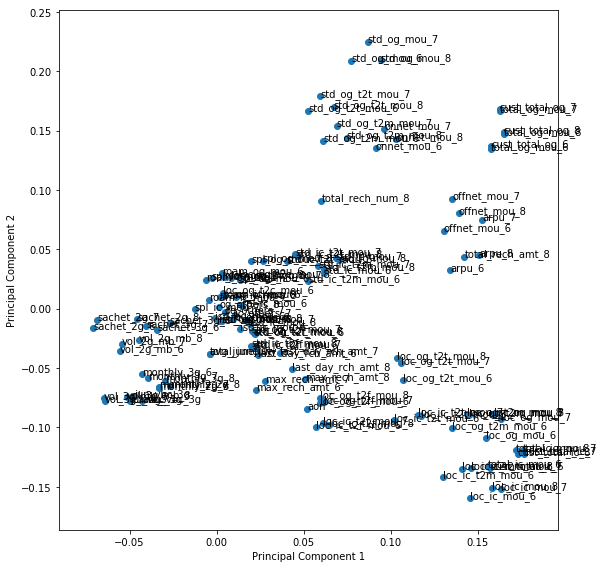

In [61]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [62]:
pca.explained_variance_ratio_

array([1.28730766e-01, 1.03142683e-01, 4.60361644e-02, 4.23443002e-02,
       3.65243518e-02, 3.15063997e-02, 2.65891657e-02, 2.59411518e-02,
       2.37794439e-02, 2.34581687e-02, 2.31867544e-02, 2.11745308e-02,
       2.08907274e-02, 1.94750344e-02, 1.83177319e-02, 1.79910622e-02,
       1.54105789e-02, 1.51754618e-02, 1.43399666e-02, 1.40435546e-02,
       1.31139032e-02, 1.22058884e-02, 1.16442140e-02, 1.10668080e-02,
       1.05071398e-02, 1.04657588e-02, 1.01447967e-02, 9.11532060e-03,
       8.81102690e-03, 8.60301408e-03, 7.85724707e-03, 7.57553852e-03,
       7.45401356e-03, 7.13277801e-03, 6.94561324e-03, 6.74667702e-03,
       6.23369048e-03, 6.17639575e-03, 5.80389817e-03, 5.64161819e-03,
       5.44774793e-03, 5.38535983e-03, 5.09659967e-03, 4.92583267e-03,
       4.87316548e-03, 4.79513283e-03, 4.75789474e-03, 4.55597378e-03,
       4.28876002e-03, 4.24308086e-03, 4.19101262e-03, 4.14415767e-03,
       3.99566285e-03, 3.87998398e-03, 3.83304063e-03, 3.70514361e-03,
      

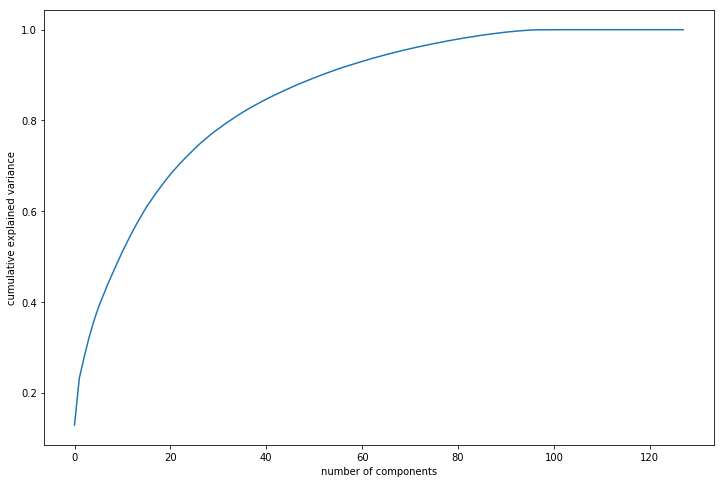

In [63]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [64]:

#As seen from the above scree plot, we take 70 components since that would explain around 95% variance..

#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=70)


In [65]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(14228, 70)

In [66]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

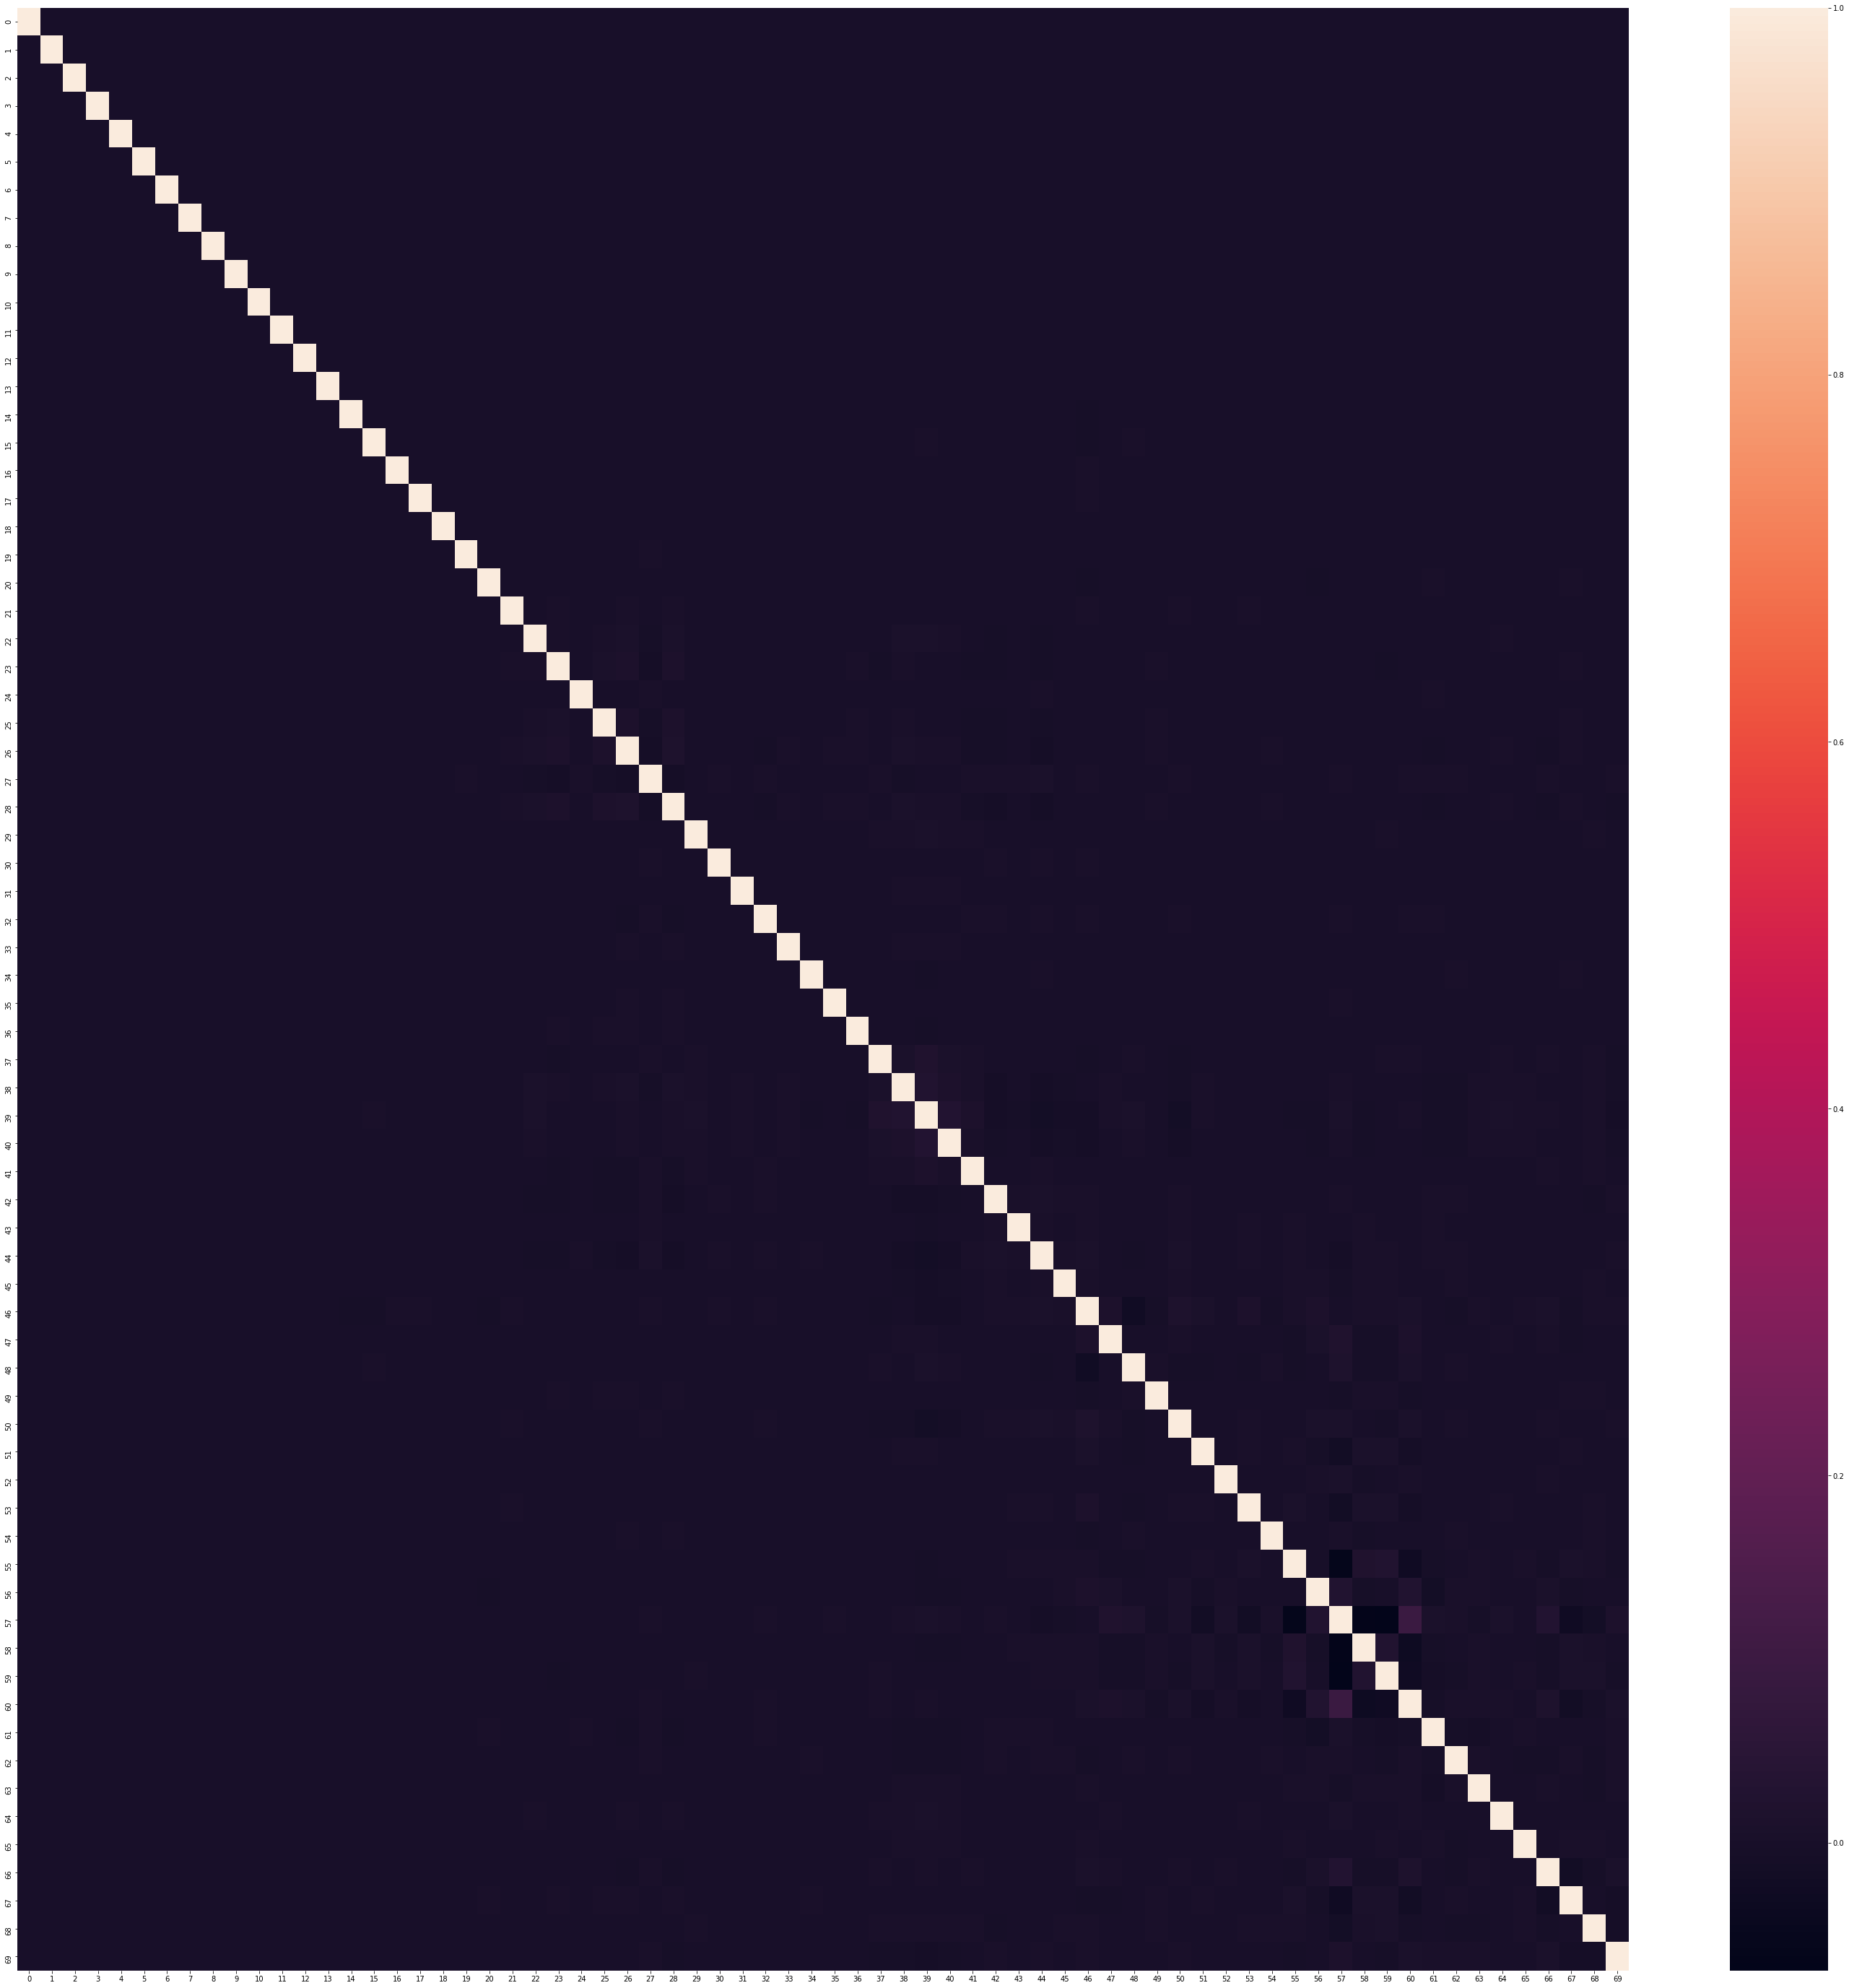

In [67]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (50,50))
sns.heatmap(corrmat)

#We observe that there is NO Correlation, thus PCA was successful.

**Logistic Regression Model**

In [68]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.0940758730783031 , min corr:  -0.06973842802228976


In [69]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression(class_weight='balanced')
model_pca = learner_pca.fit(df_train_pca,y_train)

In [70]:
#Making prediction on the TRAIN data
pred_probs_train = model_pca.predict_proba(df_train_pca)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_train, pred_probs_train))

'0.89'

In [71]:
pred_probs_train

array([0.34646313, 0.12250017, 0.00229196, ..., 0.86192972, 0.04038904,
       0.05090951])

In [72]:
train_predictions_df = pd.DataFrame({'churn':y_train.values, 
                                   'churn_prob':pred_probs_train})

train_predictions_df.head()

,churn,churn_prob
0,0,0.346463
1,0,0.122500
2,0,0.002292
3,0,0.037646
4,0,0.154946


In [73]:
train_predictions_df['churn_prediction'] = train_predictions_df['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)

train_predictions_df.head()

,churn,churn_prob,churn_prediction
0,0,0.346463,0
1,0,0.122500,0
2,0,0.002292,0
3,0,0.037646,0
4,0,0.154946,0


In [74]:
# Confusion matrix 
confusion = metrics.confusion_matrix(train_predictions_df['churn'],train_predictions_df['churn_prediction'] )
print(confusion)

[[10472  2595]
 [  197   964]]


In [75]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(train_predictions_df['churn'],train_predictions_df['churn_prediction']))

0.8037672195670509


In [76]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


# Let's see the sensitivity of our logistic regression model
print(TP / float(TP+FN))

# Let us calculate specificity
print(TN / float(TN+FP))


# Let us calculate precision
print(TP / float(TP+FP))

0.830318690783807
0.8014081273436902
0.2708626018544535


In [77]:
#function to draw ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(9,6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [78]:
fpr, tpr, thresholds = metrics.roc_curve( train_predictions_df['churn'], 
                                         train_predictions_df['churn_prob'], 
                                         drop_intermediate = False )

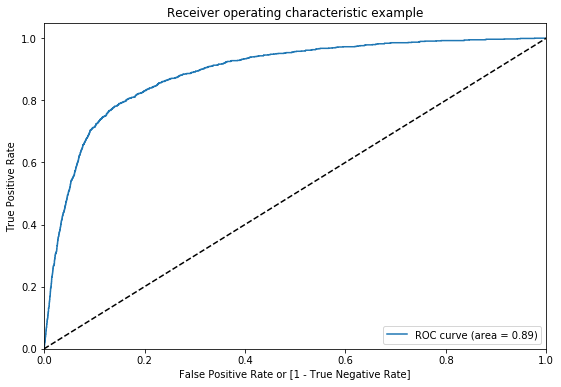

In [79]:
draw_roc(train_predictions_df['churn'],train_predictions_df['churn_prob'])

In [80]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    train_predictions_df[i]= train_predictions_df['churn_prob'].map(lambda x: 1 if x > i else 0)
train_predictions_df.head()

,churn,churn_prob,churn_prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.346463,0,1,1,1,1,0,0,0,0,0,0
1,0,0.122500,0,1,1,0,0,0,0,0,0,0,0
2,0,0.002292,0,1,0,0,0,0,0,0,0,0,0
3,0,0.037646,0,1,0,0,0,0,0,0,0,0,0
4,0,0.154946,0,1,1,0,0,0,0,0,0,0,0


In [81]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(train_predictions_df['churn'],train_predictions_df[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.081600  1.000000  0.000000
0.1   0.1  0.414464  0.975883  0.364583
0.2   0.2  0.562693  0.950904  0.528201
0.3   0.3  0.667065  0.917313  0.644830
0.4   0.4  0.742972  0.877692  0.731002
0.5   0.5  0.803767  0.830319  0.801408
0.6   0.6  0.855145  0.776055  0.862172
0.7   0.7  0.892184  0.694229  0.909773
0.8   0.8  0.913129  0.539190  0.946353
0.9   0.9  0.922125  0.269595  0.980103


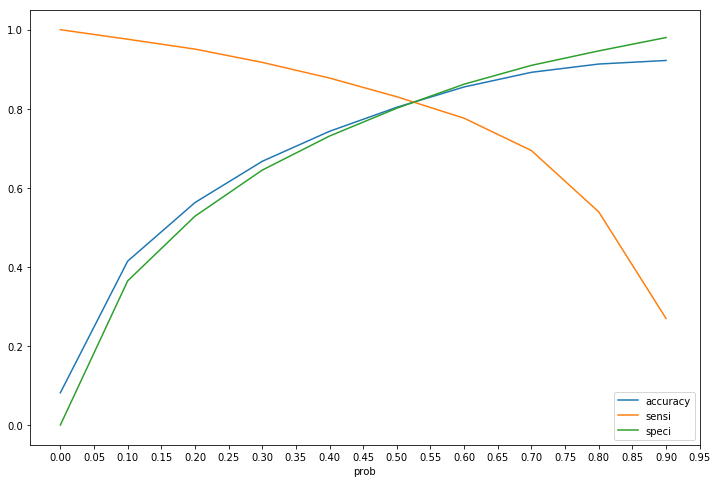

In [82]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],figsize=(12,8))
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

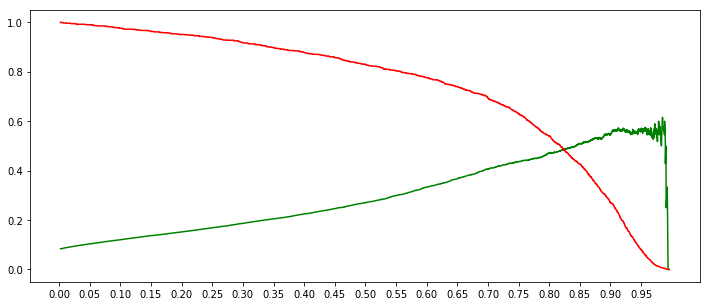

In [83]:
#precision recall tradeoff

from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(train_predictions_df['churn'], train_predictions_df['churn_prob'])

plt.figure(figsize=(12,5))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

In [84]:
#Applying selected components to the test data - 70 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(6098, 70)

In [85]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.87'

In [86]:
pred_probs_test

array([0.29752475, 0.13850875, 0.83547051, ..., 0.89858099, 0.09582269,
       0.39701169])

In [87]:
test_predictions_df = pd.DataFrame({'churn':y_test.values, 
                                   'churn_prob':pred_probs_test})

test_predictions_df.head()

,churn,churn_prob
0,0,0.297525
1,0,0.138509
2,0,0.835471
3,0,0.226501
4,0,0.414457


In [88]:
#taking the cutoff as 0.55, as observed from the above graphs

test_predictions_df['churn_prediction'] = test_predictions_df['churn_prob'].map(lambda x: 1 if x > 0.55 else 0)

test_predictions_df.head()

,churn,churn_prob,churn_prediction
0,0,0.297525,0
1,0,0.138509,0
2,0,0.835471,1
3,0,0.226501,0
4,0,0.414457,0


In [89]:
# Confusion matrix 
confusion = metrics.confusion_matrix(test_predictions_df['churn'],test_predictions_df['churn_prediction'] )
print(confusion)

[[4667  920]
 [ 109  402]]


In [90]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(test_predictions_df['churn'],test_predictions_df['churn_prediction']))

0.8312561495572319


In [91]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


# Let's see the sensitivity of our logistic regression model
print(TP / float(TP+FN))

# Let us calculate specificity
print(TN / float(TN+FP))


# Let us calculate precision
print(TP / float(TP+FP))

0.786692759295499
0.8353320207624844
0.3040847201210287


**Testing with SVM Model**

In [92]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score


In [93]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

In [94]:
# instantiating a model
model = SVC(class_weight='balanced')
cv_results = cross_val_score(model, df_train_pca, y_train, cv = folds, scoring = 'accuracy') 

In [95]:
cv_results

array([0.87807449, 0.8756149 , 0.87526353, 0.88260105, 0.87803163])

In [96]:
# tune the model

# specify the number of folds for k-fold CV
n_folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# specify range of parameters C & gamma as a list
params = [ {'gamma': [1e-2, 1e-3], 'C': [1, 10, 100]}]

# create SVC object
svc_model = SVC(class_weight='balanced')

# set up grid search scheme
model_cv = GridSearchCV(estimator = svc_model, 
                        param_grid = params, 
                        scoring= 'accuracy', 
                        cv = n_folds, 
                        verbose = 10,
                        return_train_score=True,
                        n_jobs=-1
                       )      



# fit the model on n_folds
model_cv.fit(df_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   52.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  2.8min remaining:   18.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.0min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001], 'C': [1, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=10)

In [97]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,15.402929,0.434798,2.060031,0.104225,1,0.01,"{'C': 1, 'gamma': 0.01}",0.867182,0.865425,0.866479,0.872759,0.871353,0.868639,0.002879,3,0.898436,0.900281,0.901335,0.899675,0.900905,0.900127,0.001015
1,18.292146,0.637074,2.226519,0.059532,1,0.001,"{'C': 1, 'gamma': 0.001}",0.828180,0.827477,0.827477,0.831283,0.829877,0.828859,0.001496,6,0.834036,0.834475,0.835090,0.832382,0.833436,0.833884,0.000926
2,11.204443,0.298445,1.427252,0.040402,10,0.01,"{'C': 10, 'gamma': 0.01}",0.898103,0.886507,0.891075,0.894552,0.897364,0.893520,0.004290,2,0.954314,0.958355,0.954402,0.954933,0.956075,0.955616,0.001507
3,15.266030,0.507667,2.164198,0.055088,10,0.001,"{'C': 10, 'gamma': 0.001}",0.847505,0.839072,0.843289,0.846397,0.848155,0.844883,0.003352,5,0.859251,0.858285,0.861624,0.856365,0.861724,0.859450,0.002040
4,10.596586,0.653093,1.077597,0.022751,100,0.01,"{'C': 100, 'gamma': 0.01}",0.907941,0.906184,0.901968,0.909666,0.908260,0.906803,0.002660,1,0.993411,0.993147,0.992620,0.992621,0.993060,0.992972,0.000309
5,14.704522,1.077279,1.463144,0.251168,100,0.001,"{'C': 100, 'gamma': 0.001}",0.858749,0.853830,0.856641,0.861511,0.868190,0.859784,0.004900,4,0.892374,0.893692,0.895185,0.894140,0.897654,0.894609,0.001770


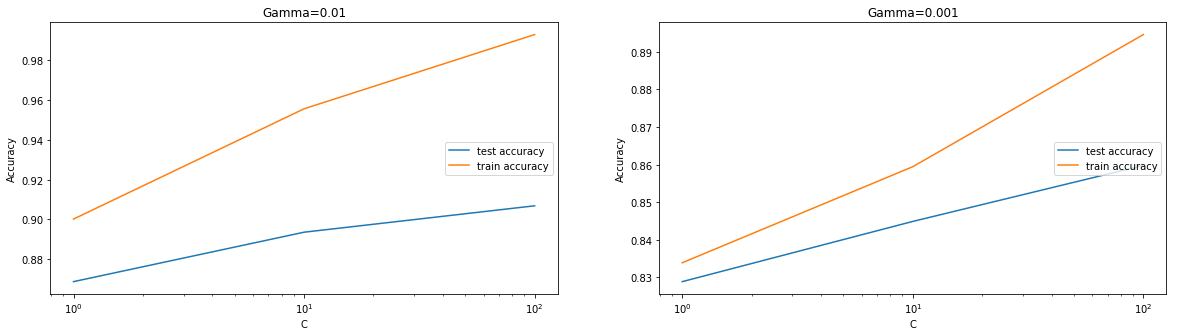

In [98]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

plt.figure(figsize=(20, 5))

cnt = 1
for gamma in params[0]['gamma']:
    
    plt.subplot(1, len(params[0]['gamma']), cnt)
    gamma_data = cv_results[cv_results['param_gamma']==gamma]
    plt.plot(gamma_data["param_C"], gamma_data["mean_test_score"])
    plt.plot(gamma_data["param_C"], gamma_data["mean_train_score"])
    plt.xlabel('C')
    plt.ylabel('Accuracy')
    plt.title("Gamma="+str(gamma))
    plt.legend(['test accuracy', 'train accuracy'], loc='center right')
    plt.xscale('log')
    cnt=cnt+1

plt.show()


In [99]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']
best_gamma = model_cv.best_params_['gamma']
# best_degree = model_cv.best_params_['degree']


print(" The highest test accuracy is {0} at C = {1} AND gamma = {2} ".format(best_score, best_C, best_gamma))

 The highest test accuracy is 0.9068034860837785 at C = 100 AND gamma = 0.01 


In [100]:
# model with the best value of C
model = SVC(class_weight='balanced', C=best_C, gamma=best_gamma, probability=True)

# fit
model.fit(df_train_pca, y_train)


SVC(C=100, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

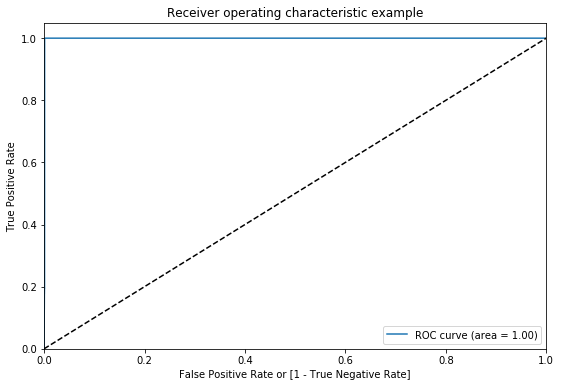

In [101]:
pred_probs_train=model.predict_proba(df_train_pca)[:,1]

train_predictions_df = pd.DataFrame({'churn':y_train, 'churn_prob':pred_probs_train})

draw_roc(train_predictions_df['churn'],train_predictions_df['churn_prob'])

In [102]:
metrics.roc_auc_score(train_predictions_df['churn'],train_predictions_df['churn_prob'])

0.9990749985481967

In [103]:
# predict
y_pred = model.predict(df_test_pca)

In [104]:
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

accuracy 0.9032469662184323


In [105]:
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.95      0.95      0.95      5587
          1       0.42      0.43      0.43       511

avg / total       0.90      0.90      0.90      6098



In [106]:
cm=metrics.confusion_matrix(y_test, y_pred)
cm

array([[5288,  299],
       [ 291,  220]], dtype=int64)

In [107]:
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negat1ives

# Let's see the sensitivity of our SVM model
print(TP / float(TP+FN))

# Let us calculate specificity
print(TN / float(TN+FP))


# Let us calculate precision
print(TP / float(TP+FP))


0.43052837573385516
0.9464829067478074
0.4238921001926782


Thus, we observed that SVM model OVERFITS.

**Decision Tree Model**

In [108]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5,class_weight={0:0.1, 1: 0.9})
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, criterion='gini',
            max_depth=5, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [109]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

             precision    recall  f1-score   support

          0       0.98      0.87      0.92      5587
          1       0.35      0.77      0.48       511

avg / total       0.92      0.86      0.88      6098



In [110]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[4853  734]
 [ 116  395]]
0.8606100360774024


**Hyperparameter Tuning**

In [111]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [112]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.099243,0.007055,0.000000,0.000000,1,{'max_depth': 1},0.927994,0.938862,0.929350,0.918453,0.932513,0.929435,0.006648,8,0.929795,0.927078,0.929456,0.932180,0.928666,0.929435,0.001662
1,0.182233,0.006743,0.000801,0.000981,2,{'max_depth': 2},0.935019,0.944835,0.939895,0.931459,0.940246,0.938291,0.004617,3,0.939724,0.937797,0.939032,0.941052,0.938944,0.939310,0.001069
2,0.266990,0.009784,0.003519,0.006086,3,{'max_depth': 3},0.935722,0.945186,0.942707,0.933568,0.940246,0.939486,0.004304,1,0.940691,0.940784,0.941228,0.943600,0.938944,0.941049,0.001495
3,0.354168,0.006682,0.000000,0.000000,4,{'max_depth': 4},0.937829,0.946240,0.942004,0.929701,0.941652,0.939486,0.005570,1,0.942799,0.943244,0.941843,0.944127,0.942458,0.942894,0.000768
4,0.436085,0.006326,0.003125,0.006250,5,{'max_depth': 5},0.936073,0.942024,0.939895,0.931107,0.941652,0.938150,0.004104,4,0.945523,0.945440,0.945006,0.947729,0.946763,0.946092,0.001006


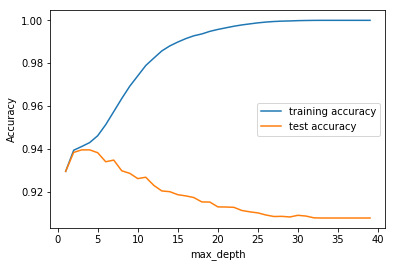

In [113]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [114]:
#For MIN_LEAF

# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [115]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.551525,0.051776,0.002221,3.938853e-04,5,{'min_samples_leaf': 5},0.918159,0.925509,0.916696,0.921968,0.918453,0.920157,0.003188,10,0.969950,0.971622,0.973381,0.972766,0.970746,0.971693,0.001260
1,1.132018,0.121475,0.002405,4.895374e-04,25,{'min_samples_leaf': 25},0.930453,0.932186,0.936028,0.931107,0.938489,0.933652,0.003095,9,0.949653,0.949745,0.951858,0.950101,0.948695,0.950011,0.001034
2,0.934297,0.039877,0.002005,1.162153e-06,45,{'min_samples_leaf': 45},0.939937,0.940267,0.938489,0.931459,0.937434,0.937518,0.003196,4,0.944645,0.944913,0.945094,0.946148,0.946236,0.945407,0.000657
3,0.834017,0.021340,0.002006,6.143617e-07,65,{'min_samples_leaf': 65},0.936424,0.940618,0.941301,0.934271,0.938840,0.938291,0.002624,1,0.943327,0.942717,0.944127,0.944918,0.944566,0.943931,0.000807
4,0.860094,0.060938,0.002004,1.419342e-06,85,{'min_samples_leaf': 85},0.934668,0.941673,0.936028,0.934622,0.942355,0.937869,0.003428,2,0.941569,0.940696,0.942809,0.943337,0.943512,0.942385,0.001084


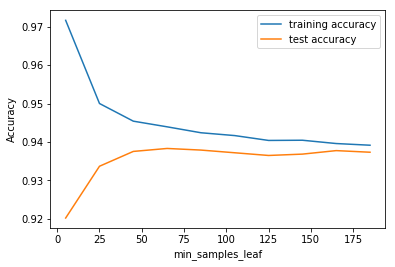

In [116]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [117]:
#For MIN_SAMPLE SPLIT

# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [118]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.926337,0.124389,0.002417,0.000484,5,{'min_samples_split': 5},0.905515,0.915671,0.911424,0.910369,0.912830,0.911161,0.003338,10,0.993234,0.992620,0.992006,0.993763,0.992006,0.992726,0.000690
1,1.846722,0.087499,0.002611,0.000484,25,{'min_samples_split': 25},0.915701,0.923401,0.916344,0.918102,0.919508,0.918611,0.002743,9,0.971004,0.972413,0.973294,0.972064,0.971624,0.972080,0.000768
2,1.821592,0.107554,0.002397,0.000481,45,{'min_samples_split': 45},0.923428,0.923401,0.928647,0.920562,0.925132,0.924234,0.002649,8,0.961515,0.965735,0.963981,0.963806,0.962312,0.963470,0.001461
3,1.796392,0.112480,0.002396,0.000464,65,{'min_samples_split': 65},0.923428,0.930077,0.931107,0.923726,0.930053,0.927678,0.003372,7,0.958527,0.959497,0.957568,0.959062,0.957656,0.958462,0.000760
4,1.785380,0.104591,0.002206,0.000401,85,{'min_samples_split': 85},0.926238,0.931483,0.931107,0.926538,0.931107,0.929294,0.002379,6,0.955540,0.956335,0.952561,0.957656,0.955021,0.955422,0.001684


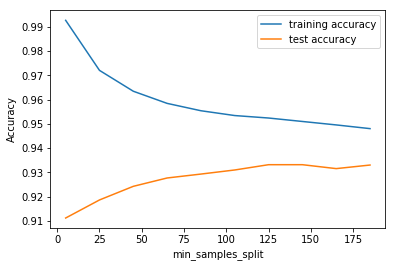

In [119]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [120]:
#Hyperparameters together

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   55.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(5, 15, 5), 'min_samples_leaf': range(50, 150, 50), 'min_samples_split': range(50, 150, 50), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [121]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.623665,0.003711,0.002011,1.385735e-05,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.939234,0.937105,0.940598,0.932865,0.936380,0.937236,0.002651,9,0.942448,0.942102,0.941140,0.942809,0.944215,0.942543,0.001004
1,0.620864,0.001728,0.002193,3.921802e-04,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 100}",0.939234,0.937105,0.940598,0.932865,0.936380,0.937236,0.002651,9,0.942448,0.942102,0.941140,0.942809,0.944215,0.942543,0.001004
2,0.610617,0.007134,0.002006,1.328315e-06,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 50}",0.936424,0.941673,0.937786,0.934622,0.939543,0.938010,0.002442,1,0.941394,0.940872,0.940262,0.942546,0.943161,0.941647,0.001066
3,0.610044,0.003940,0.002390,4.752003e-04,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 100}",0.936424,0.941673,0.937786,0.934622,0.939543,0.938010,0.002442,1,0.941394,0.940872,0.940262,0.942546,0.943161,0.941647,0.001066
4,0.964782,0.025279,0.001997,1.872216e-05,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.938883,0.939916,0.934622,0.933568,0.932513,0.935901,0.002952,15,0.944732,0.944298,0.944566,0.946148,0.945357,0.945020,0.000663
5,0.966989,0.025904,0.002002,4.644208e-06,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 100}",0.938883,0.939916,0.934622,0.933568,0.932513,0.935901,0.002952,15,0.944732,0.944298,0.944566,0.946148,0.945357,0.945020,0.000663
6,0.899404,0.026941,0.002010,2.216262e-05,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 50}",0.936424,0.941673,0.933216,0.934622,0.939543,0.937096,0.003116,12,0.941394,0.940872,0.942370,0.942546,0.943161,0.942068,0.000825
7,0.896585,0.027316,0.002005,5.309834e-07,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 100}",0.936424,0.941673,0.933216,0.934622,0.939895,0.937166,0.003174,11,0.941394,0.940872,0.942370,0.942546,0.943161,0.942068,0.000825
8,0.434577,0.001016,0.001792,3.943242e-04,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.939234,0.936753,0.936028,0.934271,0.936380,0.936534,0.001597,13,0.942448,0.942014,0.942282,0.943337,0.944215,0.942859,0.000810
9,0.435978,0.001613,0.001792,3.947247e-04,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 100}",0.939234,0.936753,0.936028,0.934271,0.936380,0.936534,0.001597,13,0.942448,0.942014,0.942282,0.943337,0.944215,0.942859,0.000810


In [122]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9380095586168119
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [123]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [124]:
# accuracy score
clf_gini.score(X_test,y_test)

0.9367005575598557

In [125]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.96      0.97      0.97      5587
          1       0.65      0.53      0.59       511

avg / total       0.93      0.94      0.93      6098



In [126]:
# confusion matrix
confusion= confusion_matrix(y_test,y_pred)

print(confusion)

[[5439  148]
 [ 238  273]]


In [127]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


# Let's see the sensitivity of our Decision Tree model
print(TP / float(TP+FN))

# Let us calculate specificity
print(TN / float(TN+FP))


# Let us calculate precision
print(TP / float(TP+FP))

0.5342465753424658
0.9735099337748344
0.6484560570071259


In [128]:
imp_features = pd.DataFrame(columns=['Feature','Importance Score'])

imp_features['Feature']=X_train.head().columns

imp_features['Importance Score']=clf_gini.feature_importances_

imp_features.sort_values(by=['Importance Score'],ascending=False)

,Feature,Importance Score
80,total_ic_mou_8,0.660339
103,vol_3g_mb_8,0.094147
2,arpu_8,0.049733
124,cust_total_ic_8,0.048302
14,roam_og_mou_8,0.041862
13,roam_og_mou_7,0.027405
125,cust_total_og_6,0.020362
40,std_og_mou_7,0.012967
78,total_ic_mou_6,0.010095
99,vol_2g_mb_7,0.007840


Therefore, some of the Important features are as follows:

-- total_ic_mou_8

-- vol_3g_mb_8

-- arpu_8

-- cust_total_ic_8

-- roam_og_mou_8



#### Plotting the Decision Tree

In [129]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(imp_features.Feature)

In [130]:
# Specifing path for dot file.
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin'

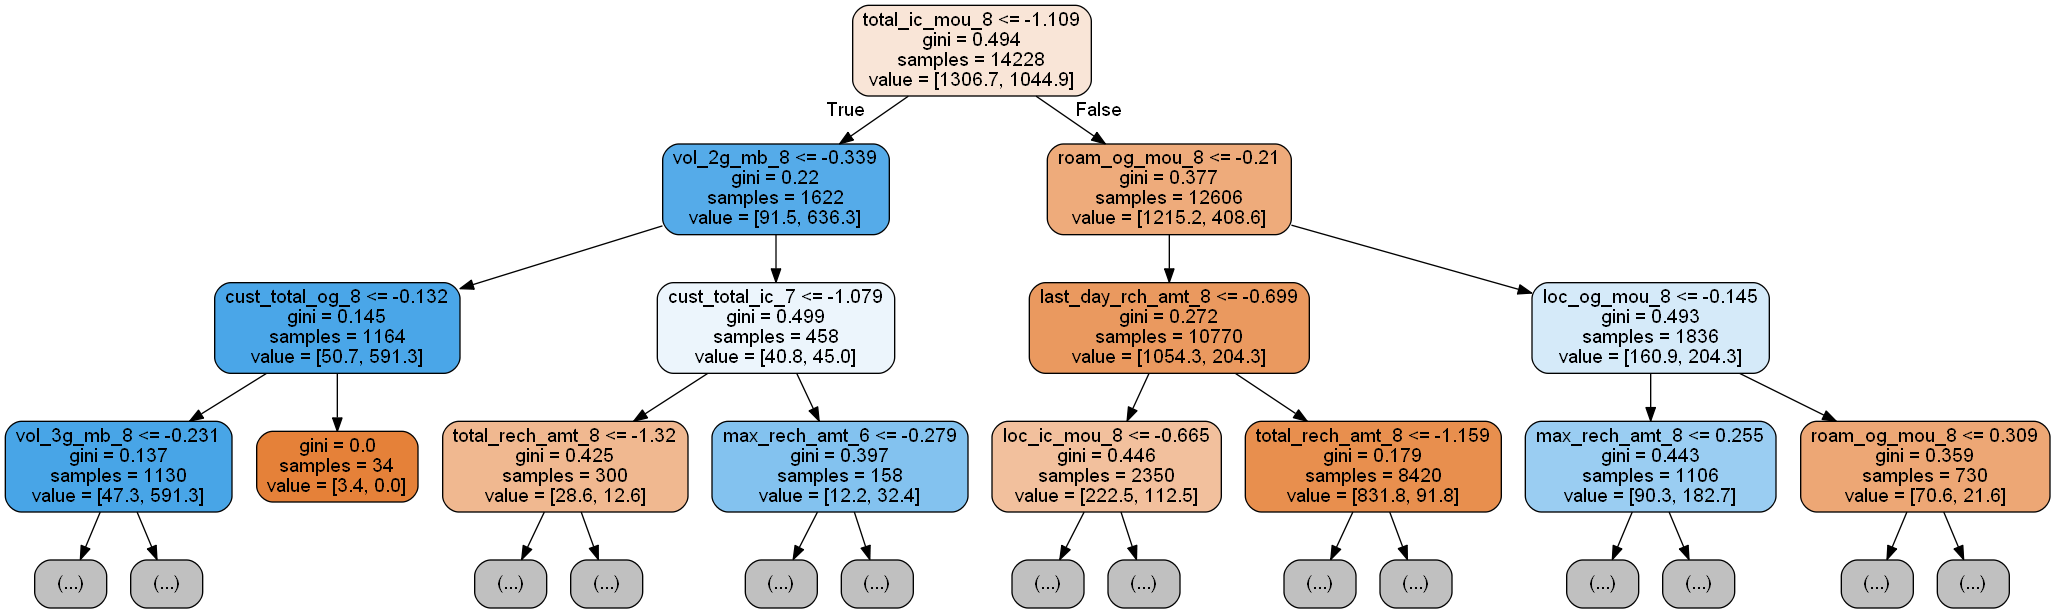

In [131]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True,max_depth=3)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

---  

### Observations and Recommendations

**Observations:**

To conclude,
PCA helped us reduce the dimensions from 130 to 70, while retaining 95% of variance explanation.

The Logistic Regression Model Performed well in predicting the churn, giving the following metrics:
- Overall Accuracy: 83% 
- Sensitivity: 79%
- Specificity: 83%
- Precision: 31%

It gave a good Sensitivity (Recall rate) of 79% which is a decent metric to evaluate our model with reference to our business objective.
This is because a good Sensitivity rate would imply that out of 100 customers who Actually Churn, we will be able to predict and identify about 79 of them before hand and thus take measures to retain them.
The accuracy of 83% was also very good along with a good specificity of 83% and moderate precision of about 31%.

We observed that SVM Model was of NO USE Since it was Overfitting.

Thus, Logistic Regression Model would be good to use for predicting churners (from High Value Customers) and take measures to retain them. 

The Decision Tree model helped in identifying the Most Important features in predicting churners. 
The top 5 features were:

- total_ic_mou_8  ie. Total Incoming Call Minutes of Usage (voice calls) in August. (Most Important Feature)
- vol_3g_mb_8 ie. Volume of 3g mobile data (in mb) taken in August.
- arpu_8 ie. Average revenue per user in August.
- cust_total_ic_8 ie. Customer's Total Incoming calls usage in August.
- roam_og_mou_8 ie. Outgoing call Minutes of Usage while on Roaming, in August.

**Recommendations:**

Thus, based on the above observations, Following recommendations are made:

- Customers whose Total Incoming Call Minutes of Usage (for voice calls) has dropped significantly in August, should be MOST FOCUSED ON. Since they are extremely likely to churn. They should be sent attractive and customised offers tailored to their usage of services in the past. Calls should also be made to them inorder to get their response and reasons for displeasure with the service. Accordingly, action should be taken to attract and retain them.


- Customers whose purchase of 3g data packs and average revenue per user has fallen down in August, should be enticed with attractive Mobile Internet Data Packs of 2g,3g and 4g at low costs. Offers could be tailored to their usage patterns such as customers generally using data pack in the night could be enticed with low cost Night Data packs of 3g or 4g.


- Customers whose Outgoing call Minutes of Usage While on Roaming has reduced in the month of August should be sent Roaming offers such as low outgoing call charges, limited time (one or two days maybe?) internet packs for free or very low cost should be provided to wane their chances of churning.


Therefore, if customers that were predicted as churners by our Logistic Regression Model are targeted based on the above mentioned important features (as depicted by our Decision Tree Model), a lot of customers (80% of Actual Churners, as our sensitivity was about 80%) can be targeted to be retained and stopped from churning. As a result the churn rate of decrease and retention would increase along with reduction in costs incurred by the company to acquire new customers. 

**THE END**